In [3]:
import numpy as np # NumPy
import matplotlib.pylab as plt # Matplotlib plots
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import mpl_scatter_density
import pandas as pd # Pandas
# import uproot
import pickle
import logging
import pprint

import os # read directories etc.
from scipy.optimize import curve_fit
import pylandau  # Landau Gaussian convolution

from LoadBatch import *
from SensorClasses import *

verbose = False


### All the steps of the analysis put together and logically sequenced

In [4]:
### set logs level
logging.basicConfig(level=logging.WARNING, format='[%(levelname)s] -\t %(message)s')

## Generic bins options, Batches import
the Batch objects are created by "logbook reader", it reads the .csv containing all the information about the batches (temperature, runs, angles, sensors etc.). Next I put all of the Batches into a dictionary for easier access

In [5]:
PIXEL_SIZE = 0.0185 #mm

### choose the bins so that they match the MIMOSA pixels (which are just the coordinates)
large_bins = (np.arange(0, 900,1),
              np.arange(0, 900,1))

bins1 = (np.arange(450, 700, 1),
        np.arange(200, 500, 1))

bins2 = (np.arange(500, 650, 1),
              np.arange(200, 450, 1))

### Load the dictionary of sensor names and runs
dict_of_batches = read_pickle("dict_of_batches.pickle")

logging.info(f"dictionary of the batches: \n{dict_of_batches}")

### presentation path
pres_path = '/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/Presentations/8 December 23'

## Plot a single batch 
and a single oscilloscope

In [6]:
### show all information about the batch
this_batch = 401
S = 'S1'
print(dict_of_batches[this_batch].__dict__,'\n')

### show all informations about each sensor
for ch, sensor in dict_of_batches[this_batch].S[S].channels.items():
    print(f"{S}, {ch}:", sensor.__dict__)

{'batch_number': 401, 'angle': 0.0, 'runs': [9620, 9621, 9622, 9624, 9625, 9627, 9628, 9629, 9630], 'tempA': -30.555555555555557, 'tempB': -30.555555555555557, 'S': {'S1': <SensorClasses.Oscilloscope object at 0x7f0bb68f2200>, 'S2': <SensorClasses.Oscilloscope object at 0x7f0bb68f24a0>}} 

S1, Ch1: {'name': 'MCP', 'board': ' ', 'dut_position': 5.0, 'fluence': 0, 'transimpedance': 4700, 'voltage': 2500}
S1, Ch2: {'name': 'USTC2.1-W17-P6-A', 'board': 'CERN-3', 'dut_position': 3.0, 'fluence': 0, 'transimpedance': 10700, 'voltage': -80}
S1, Ch3: {'name': 'USTC2.1-W17-P6-A', 'board': 'CERN-3', 'dut_position': 3.0, 'fluence': 0, 'transimpedance': 10700, 'voltage': -80}
S1, Ch4: {'name': 'IMEv3-W12-C3-1-4', 'board': 'CERN-1', 'dut_position': 1, 'fluence': 0, 'transimpedance': 10700, 'voltage': -80}


### 2D Tracks

In [8]:
SAVE = False

threshold_charge = 4 #fC
DUTs = [1,2,3]

print("Batch: ", this_batch)
print(S)
df = load_batch(this_batch,S)
print(f'MCP: {dict_of_batches[this_batch].S[S].channels["Ch1"].voltage} V, angle: {dict_of_batches[this_batch].angle}°', 'temperature:%.2f°C'%dict_of_batches[this_batch].tempA)

time_cut = [time_mask(df, i, bins=5000, plot=False)[0] for i in DUTs]
print(dict_of_batches[this_batch].S['S2'].channels['Ch2'].__dict__)

# plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=bins1,
#      n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S} (no cuts)', savefig_path=pres_path, fmt='png')

# plot(df, "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut=True, only_select='XY', mask=time_cut,
#     bins=bins1, n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S} threshold_charge:{threshold_charge}fC')

# plot(df, "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut=False,
#     bins=bins1, n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S} threshold_charge:{threshold_charge}fC')

# plot(df, "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut=True, only_select='extended', zoom_to_sensor=True,
#     bins=bins1, n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S} threshold_charge:{threshold_charge}fC ')


Batch:  401
S1
MCP: 2500 V, angle: 0.0° temperature:-30.56°C
{'name': 'CNM-R15973-W5-D138', 'board': 'JSI-B14', 'dut_position': 4, 'fluence': 0, 'transimpedance': 4700, 'voltage': -80}


### Apply a pulseHeight cut
to select only the sensor area

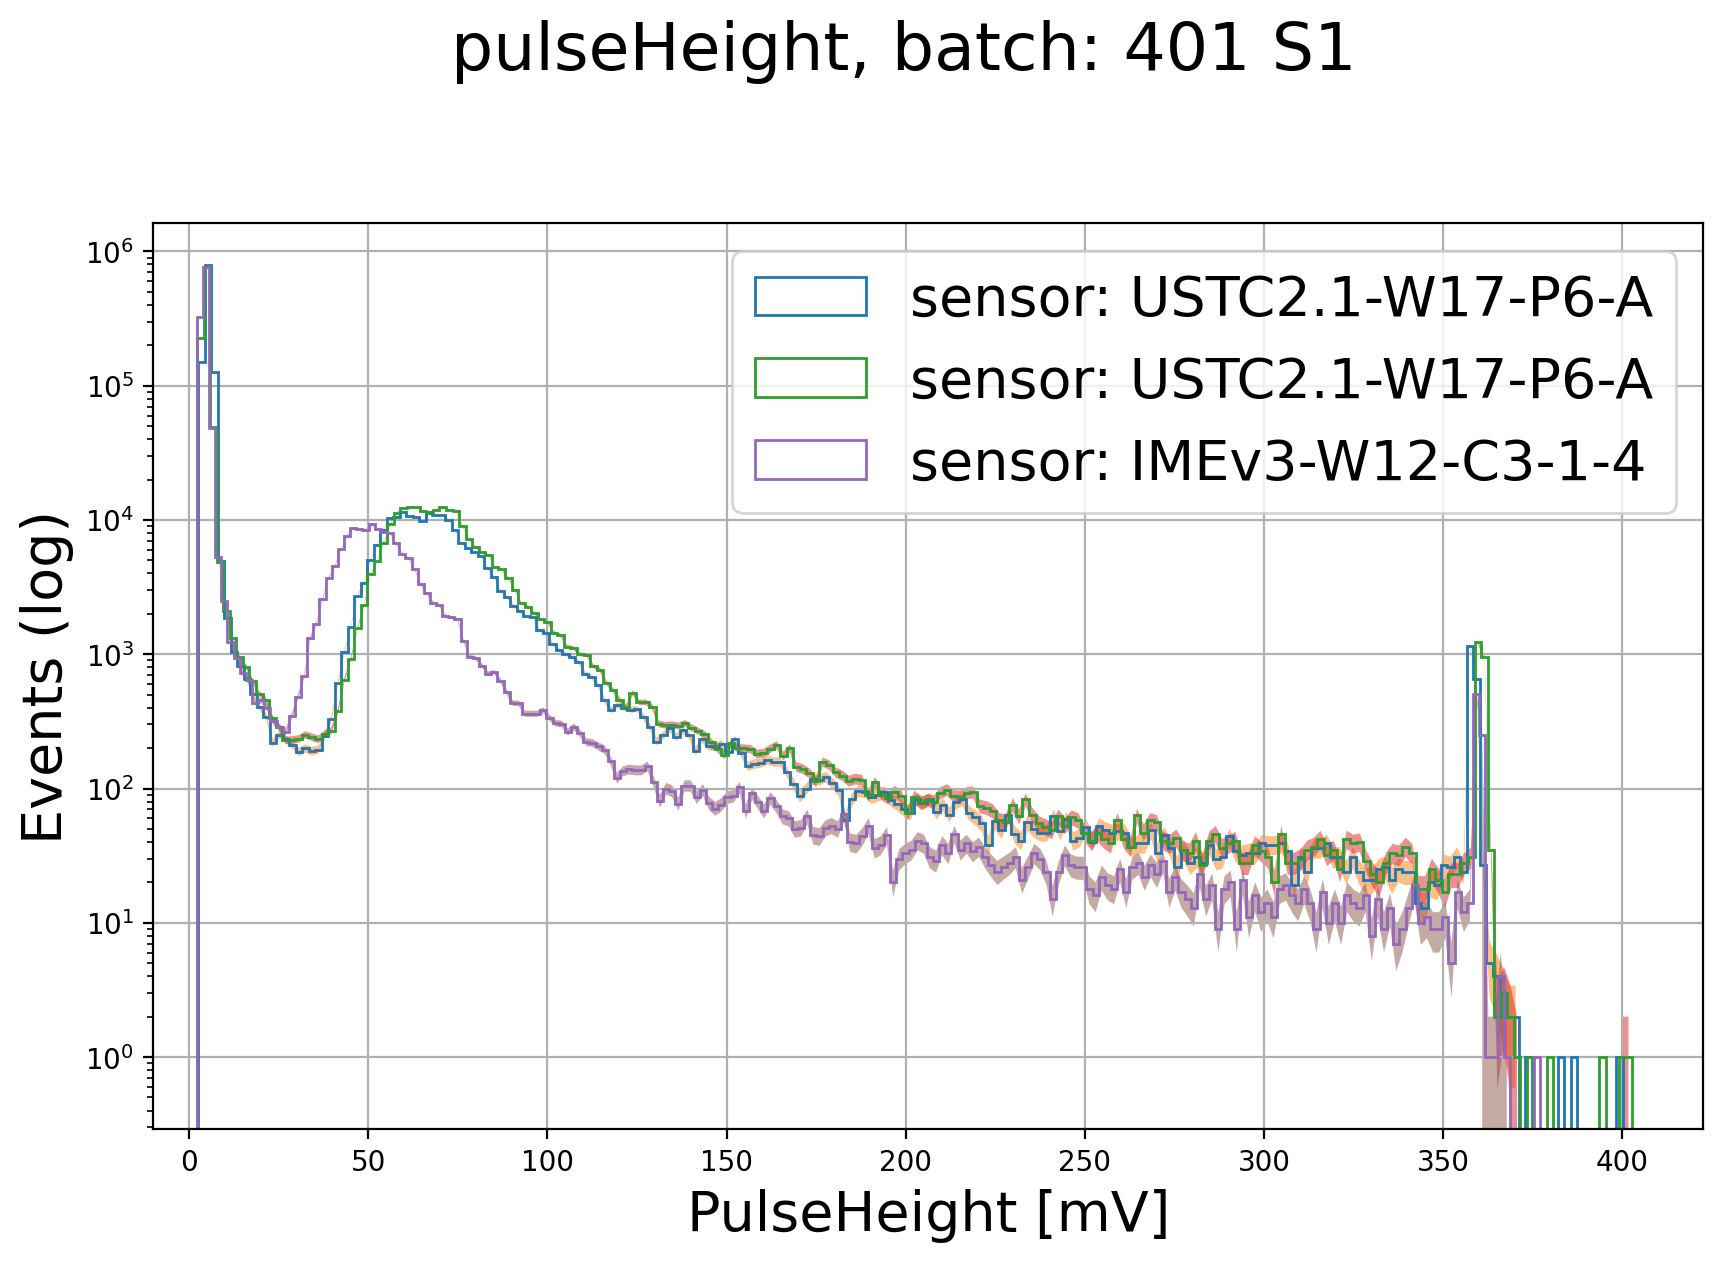

(<Figure size 2000x1200 with 1 Axes>,
 <AxesSubplot:xlabel='PulseHeight [mV]', ylabel='Events (log)'>)

In [20]:
plot(df, "pulseHeight", dict_of_batches[this_batch], S,
    savefig=SAVE, savefig_details=f'{S}', savefig_path=pres_path, fmt='png')

DUT_1
DUT_2
DUT_3


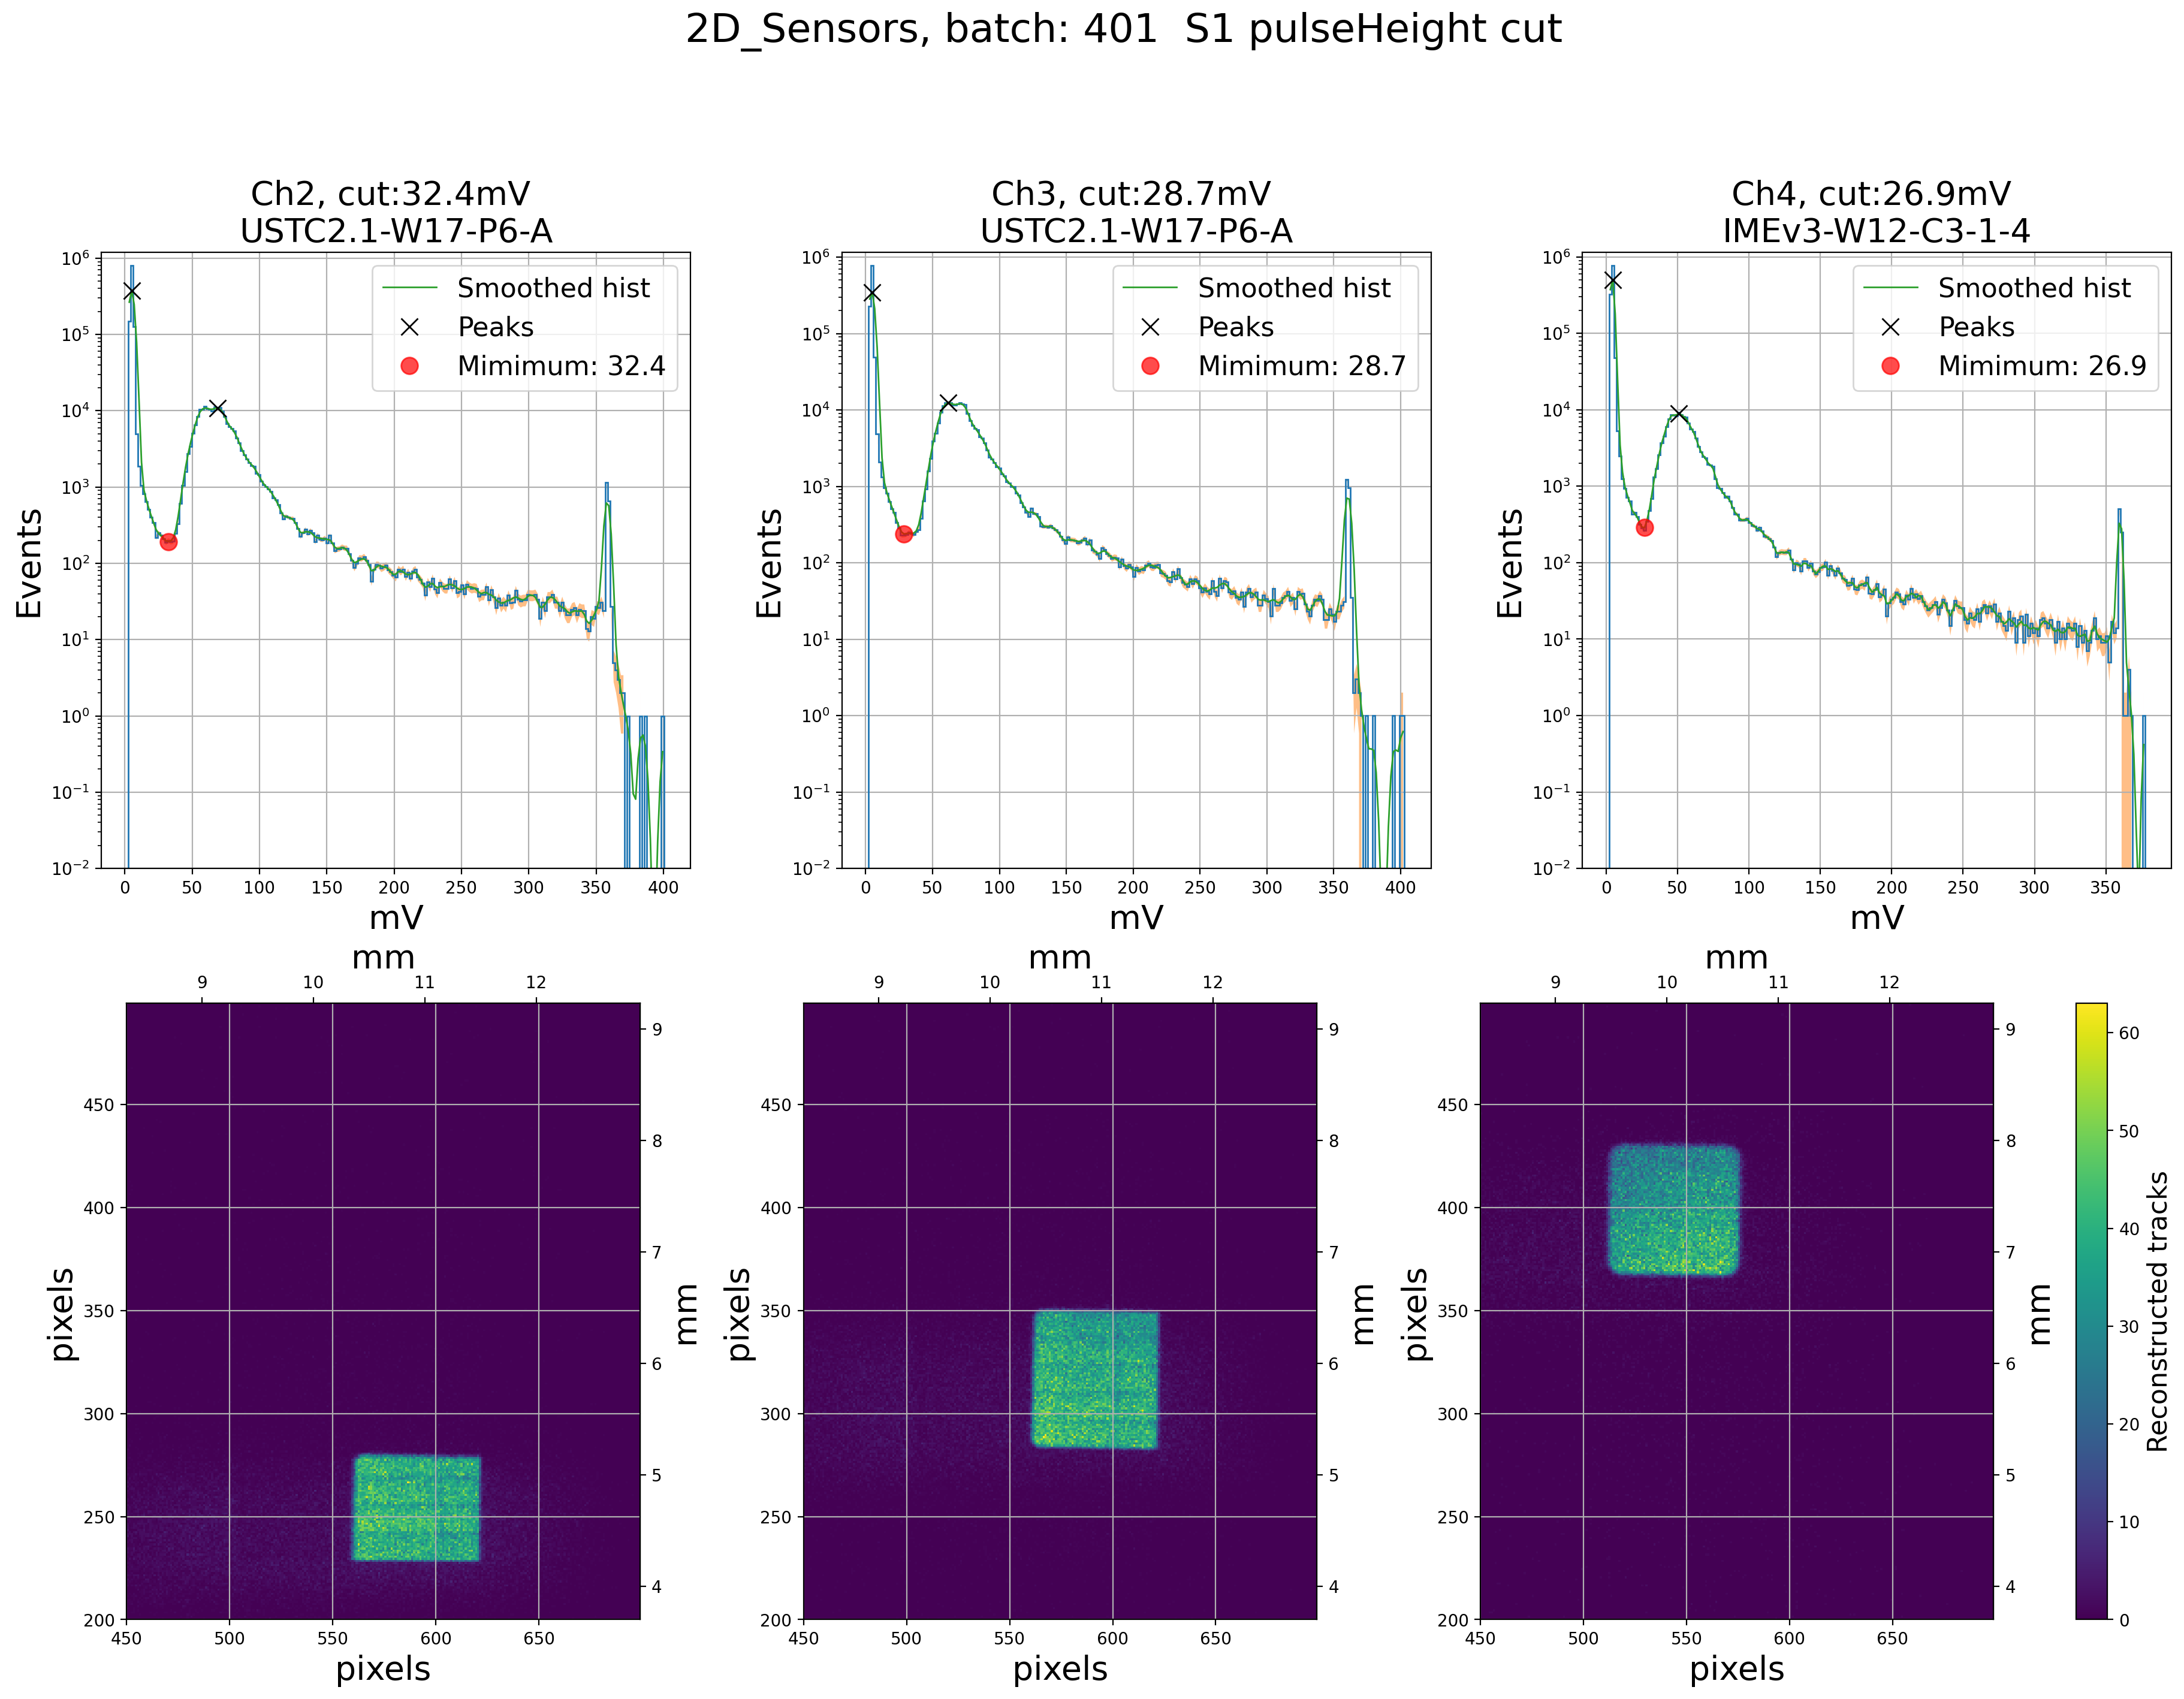

(<Figure size 3600x2400 with 7 Axes>,
 array([[<AxesSubplot:title={'center':'Ch2, cut:32.4mV \nUSTC2.1-W17-P6-A'}, xlabel='mV', ylabel='Events'>,
         <AxesSubplot:title={'center':'Ch3, cut:28.7mV \nUSTC2.1-W17-P6-A'}, xlabel='mV', ylabel='Events'>,
         <AxesSubplot:title={'center':'Ch4, cut:26.9mV \nIMEv3-W12-C3-1-4'}, xlabel='mV', ylabel='Events'>],
        [<AxesSubplot:xlabel='pixels', ylabel='pixels'>,
         <AxesSubplot:xlabel='pixels', ylabel='pixels'>,
         <AxesSubplot:xlabel='pixels', ylabel='pixels'>]], dtype=object))

In [19]:
SAVE = True
plot(df, "2D_Sensors", dict_of_batches[this_batch], S, bins=bins1,
     n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} pulseHeight cut', savefig_path=pres_path, fmt='png')

### Use the Tracks with a pulseHeight cut to define the 'edges' of the sensor

In [13]:
### Calculate the mins in the pulseHeight cut
mins = [find_min_btw_peaks(df[f"pulseHeight_{i}"], bins='rice', plot=False) for i in range(1,4)]
mins.insert(0,None)     ### insert None as the 'peak' of the MCP

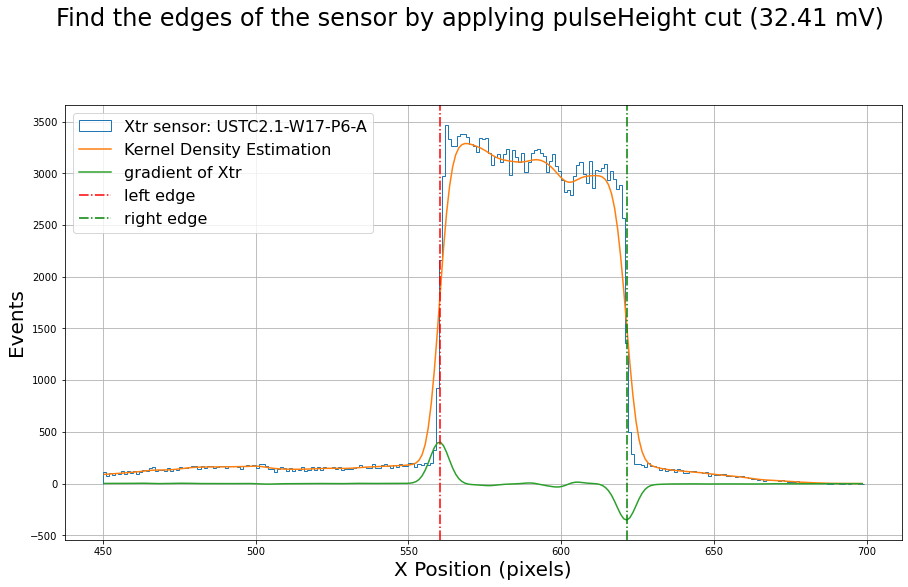

In [18]:
dut = 1
Xtr_cut = df[f'Xtr_{dut}'].loc[df[f'pulseHeight_{dut}']>mins[dut]]

fig, ax = plt.subplots(figsize=(15,8))
hist, my_bins, _ = ax.hist(Xtr_cut, bins=bins1[0], histtype='step', label=f"Xtr sensor: {dict_of_batches[this_batch].S[S].get_sensor(f'Ch{dut+1}').name}")

kde = gaussian_kde(Xtr_cut)
density_factor = sum(hist)*np.diff(my_bins)
bins_centers = (my_bins[1:]+my_bins[:-1])/2
values = time_limited_kde_evaluate(kde, bins_centers)*density_factor
ax.plot(bins_centers, values, label="Kernel Density Estimation")
ax.plot(bins_centers, np.gradient(values), label='gradient of Xtr')

left_edge = bins_centers[np.argmax(np.gradient(values))]
right_edge = bins_centers[np.argmin(np.gradient(values))]

ax.axvline(left_edge, color='r', linestyle='-.', label='left edge')
ax.axvline(right_edge, color='g', linestyle='-.', label='right edge')
fig.suptitle("Find the edges of the sensor by applying pulseHeight cut (%.2f mV)"%mins[dut], fontsize=24, y=1.05)

ax.set_xlabel("X Position (pixels)", fontsize=20)
ax.set_ylabel("Events", fontsize=20)
ax.grid('--')
ax.legend(fontsize=16, loc='upper left')

# fig.savefig(os.path.join(pres_path,f"locating_edges_Xtr_batch_{this_batch}_{S}_DUT{dut}.svg"),bbox_inches='tight')

## Geometry cut
I can now use the previous result as a definition for the geometry cut

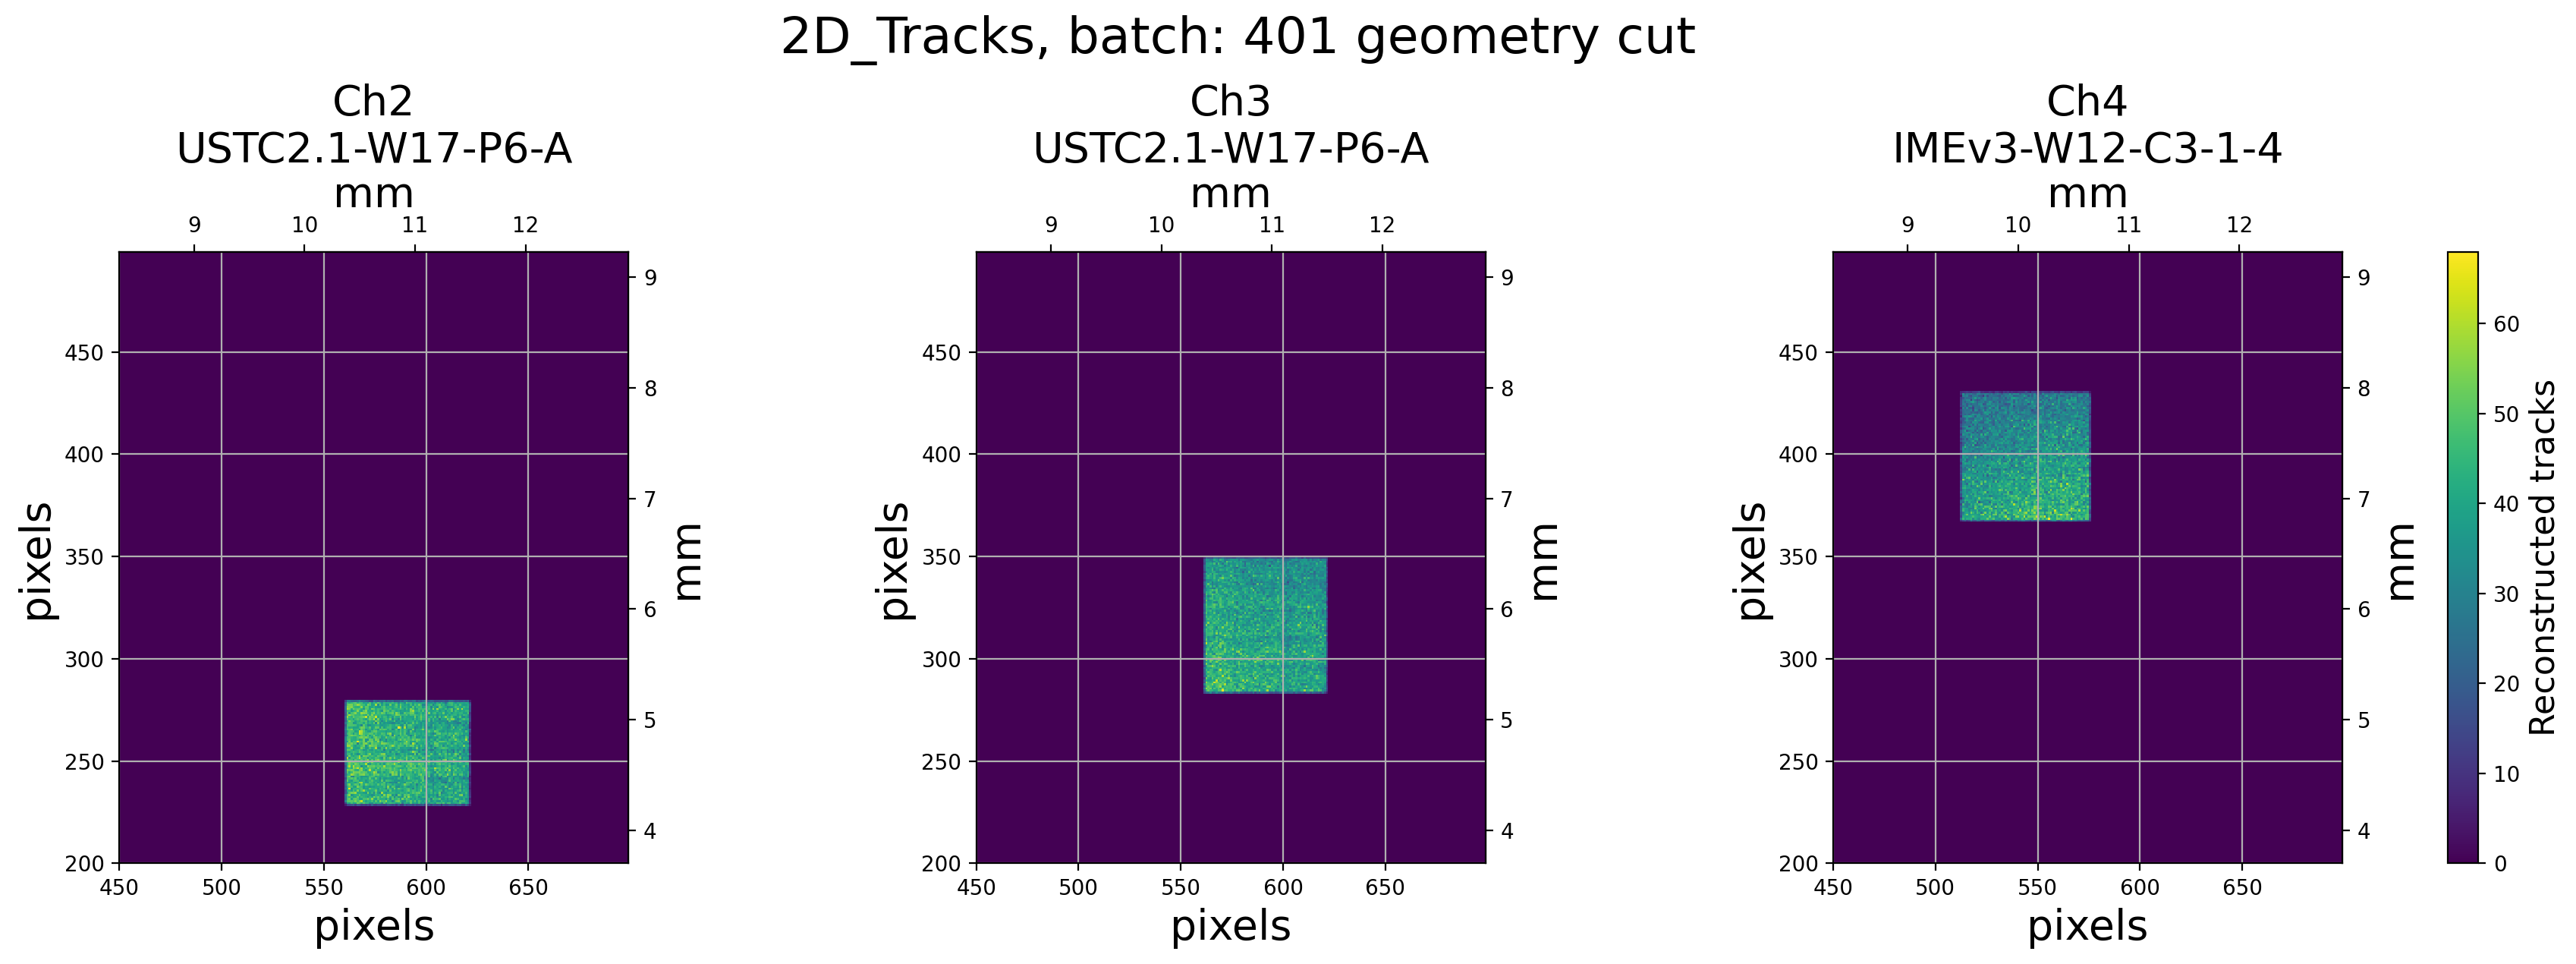

(<Figure size 3600x1200 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Ch2\nUSTC2.1-W17-P6-A'}, xlabel='pixels', ylabel='pixels'>,
        <AxesSubplot:title={'center':'Ch3\nUSTC2.1-W17-P6-A'}, xlabel='pixels', ylabel='pixels'>,
        <AxesSubplot:title={'center':'Ch4\nIMEv3-W12-C3-1-4'}, xlabel='pixels', ylabel='pixels'>],
       dtype=object))

In [23]:
geo_cuts = [geometry_mask(df, bins1, 'rice', dut, only_select='normal')[0] for dut in DUTs]

plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=bins1, mask=geo_cuts,
     n_DUT=DUTs, savefig=SAVE, savefig_details='geometry cut', savefig_path=pres_path, fmt='png')

### Geometry cut AND pulseHeight cut


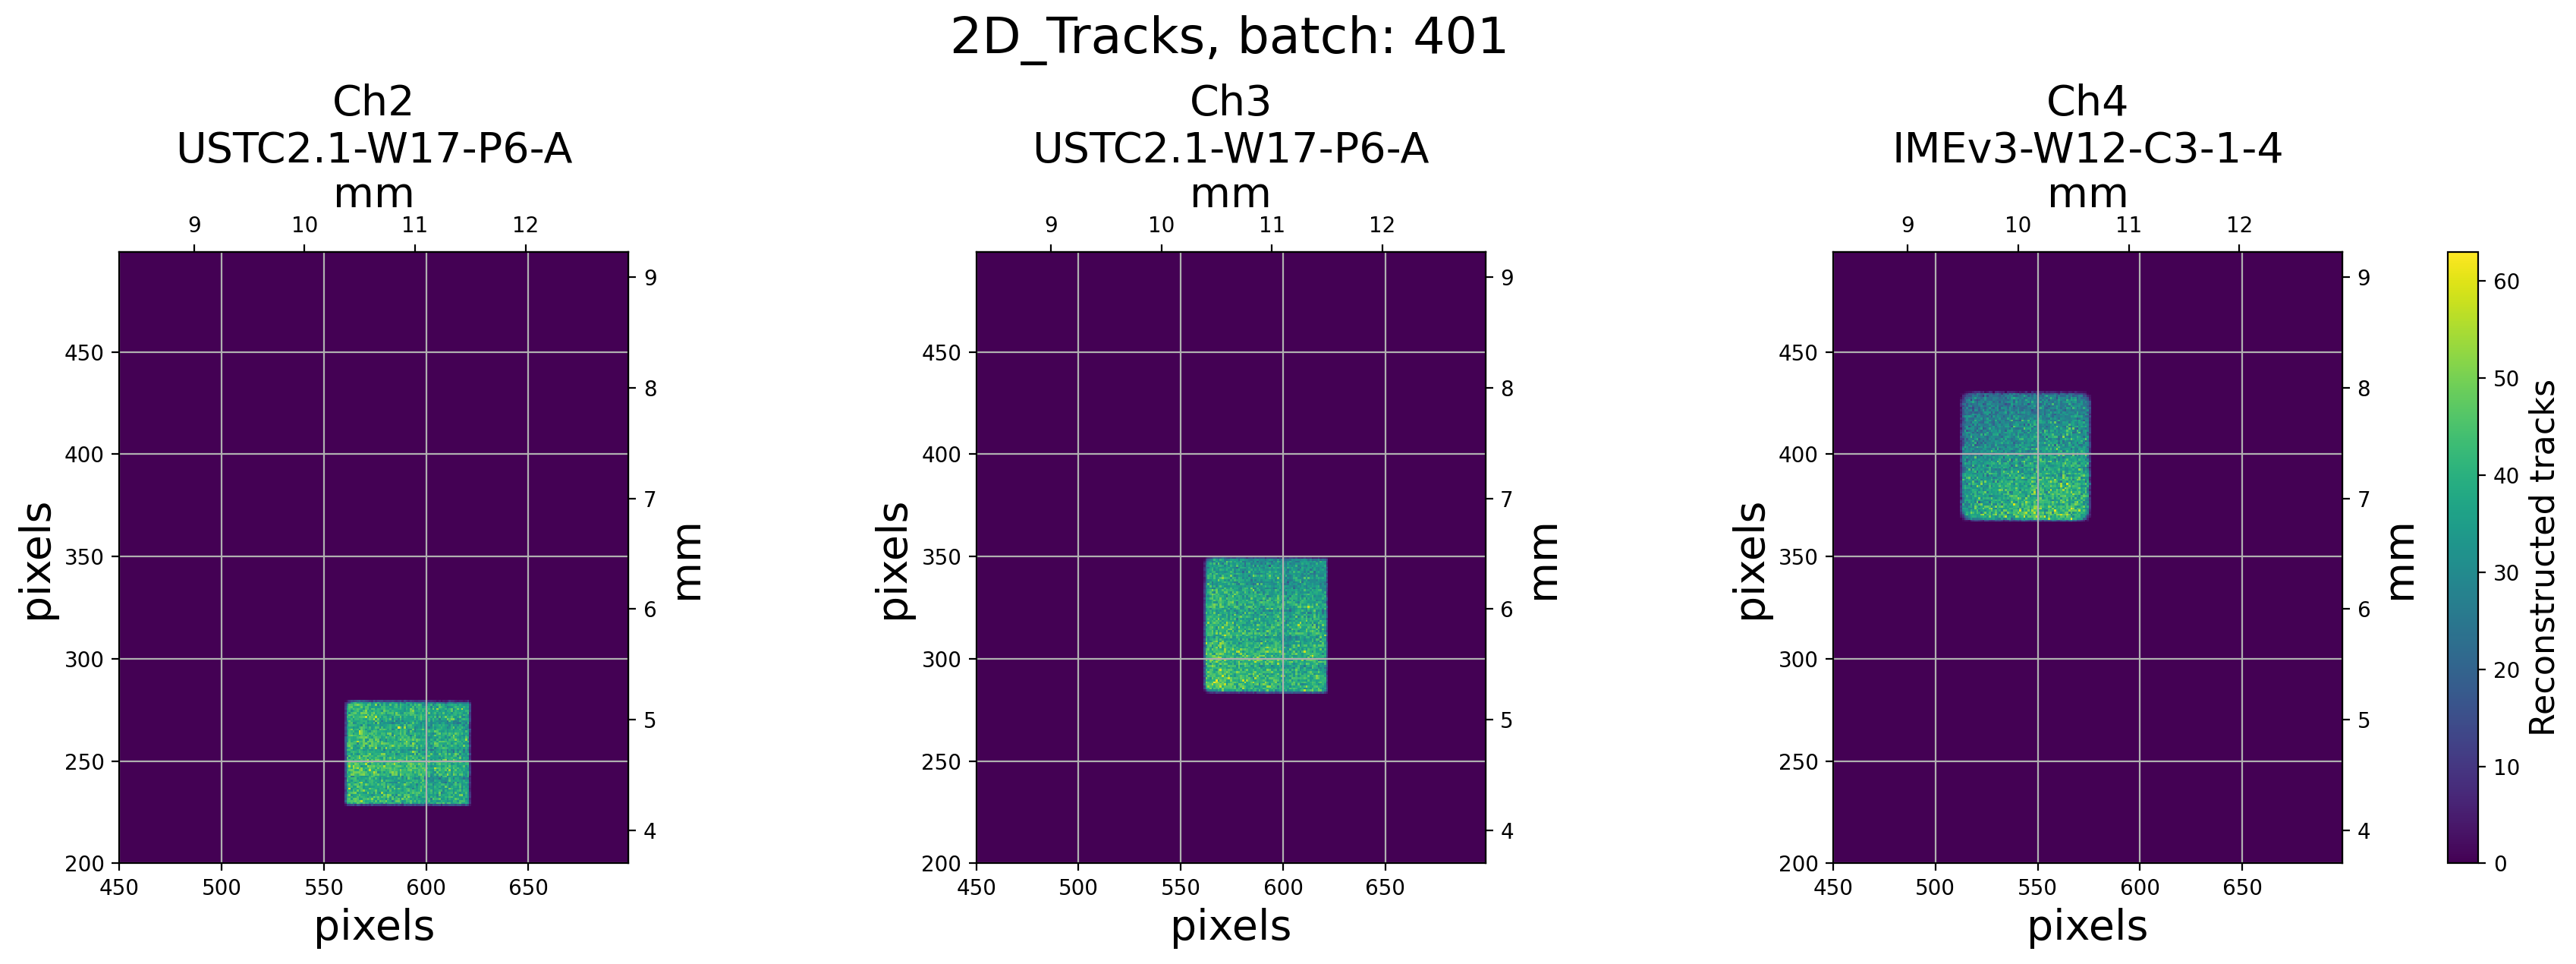

(<Figure size 3600x1200 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Ch2\nUSTC2.1-W17-P6-A'}, xlabel='pixels', ylabel='pixels'>,
        <AxesSubplot:title={'center':'Ch3\nUSTC2.1-W17-P6-A'}, xlabel='pixels', ylabel='pixels'>,
        <AxesSubplot:title={'center':'Ch4\nIMEv3-W12-C3-1-4'}, xlabel='pixels', ylabel='pixels'>],
       dtype=object))

In [13]:
### RAW TRACKS
pulse_cuts = [df[f"pulseHeight_{dut}"]>mins[dut] for dut in DUTs]
pulse_geo = [np.logical_and(geo_cuts[i],pulse_cuts[i]) for i,dut in enumerate(DUTs)]

plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=bins1, mask=pulse_geo,
     n_DUT=DUTs, savefig=SAVE)

### With the options to:
- selecting a slightly larger area to study the outer part
- selecting only the center, to get the clearest signal 

In [14]:
### RAW TRACKS
# geo_cuts = [geometry_mask(df, bins1, 'rice', dut, only_select='extended')[0] for dut in DUTs]

# plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=bins1, mask=geo_cuts,
#      n_DUT=DUTs, savefig=SAVE)

In [15]:
# geo_cuts = [geometry_mask(df, bins1, 'rice', dut, only_select='center')[0] for dut in DUTs]

# plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=bins1, mask=geo_cuts,
#      n_DUT=DUTs, savefig=SAVE)

## Next option: time cut
Fit the $\Delta t$ with a gaussian, pick 4 $\sigma$ interval and select events only in this window
Apply the fit from -20ns to +20ns so that the background is more flat
- also add full time range

### Gaussian:
$$
\Large
f(x,A,\mu,\sigma,BG) = A \cdot e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma} \right)^2} + BG
$$

- $A:  \quad $ Amplitude (n° of events)
- $\mu: \quad $ Mean of the gaussian
- $\sigma: \quad $ Standard deviation
- $BG: \quad $  Flat background

Text(0.5, 0.95, 'Time difference \n Batch: 401, Oscilloscope: S1')

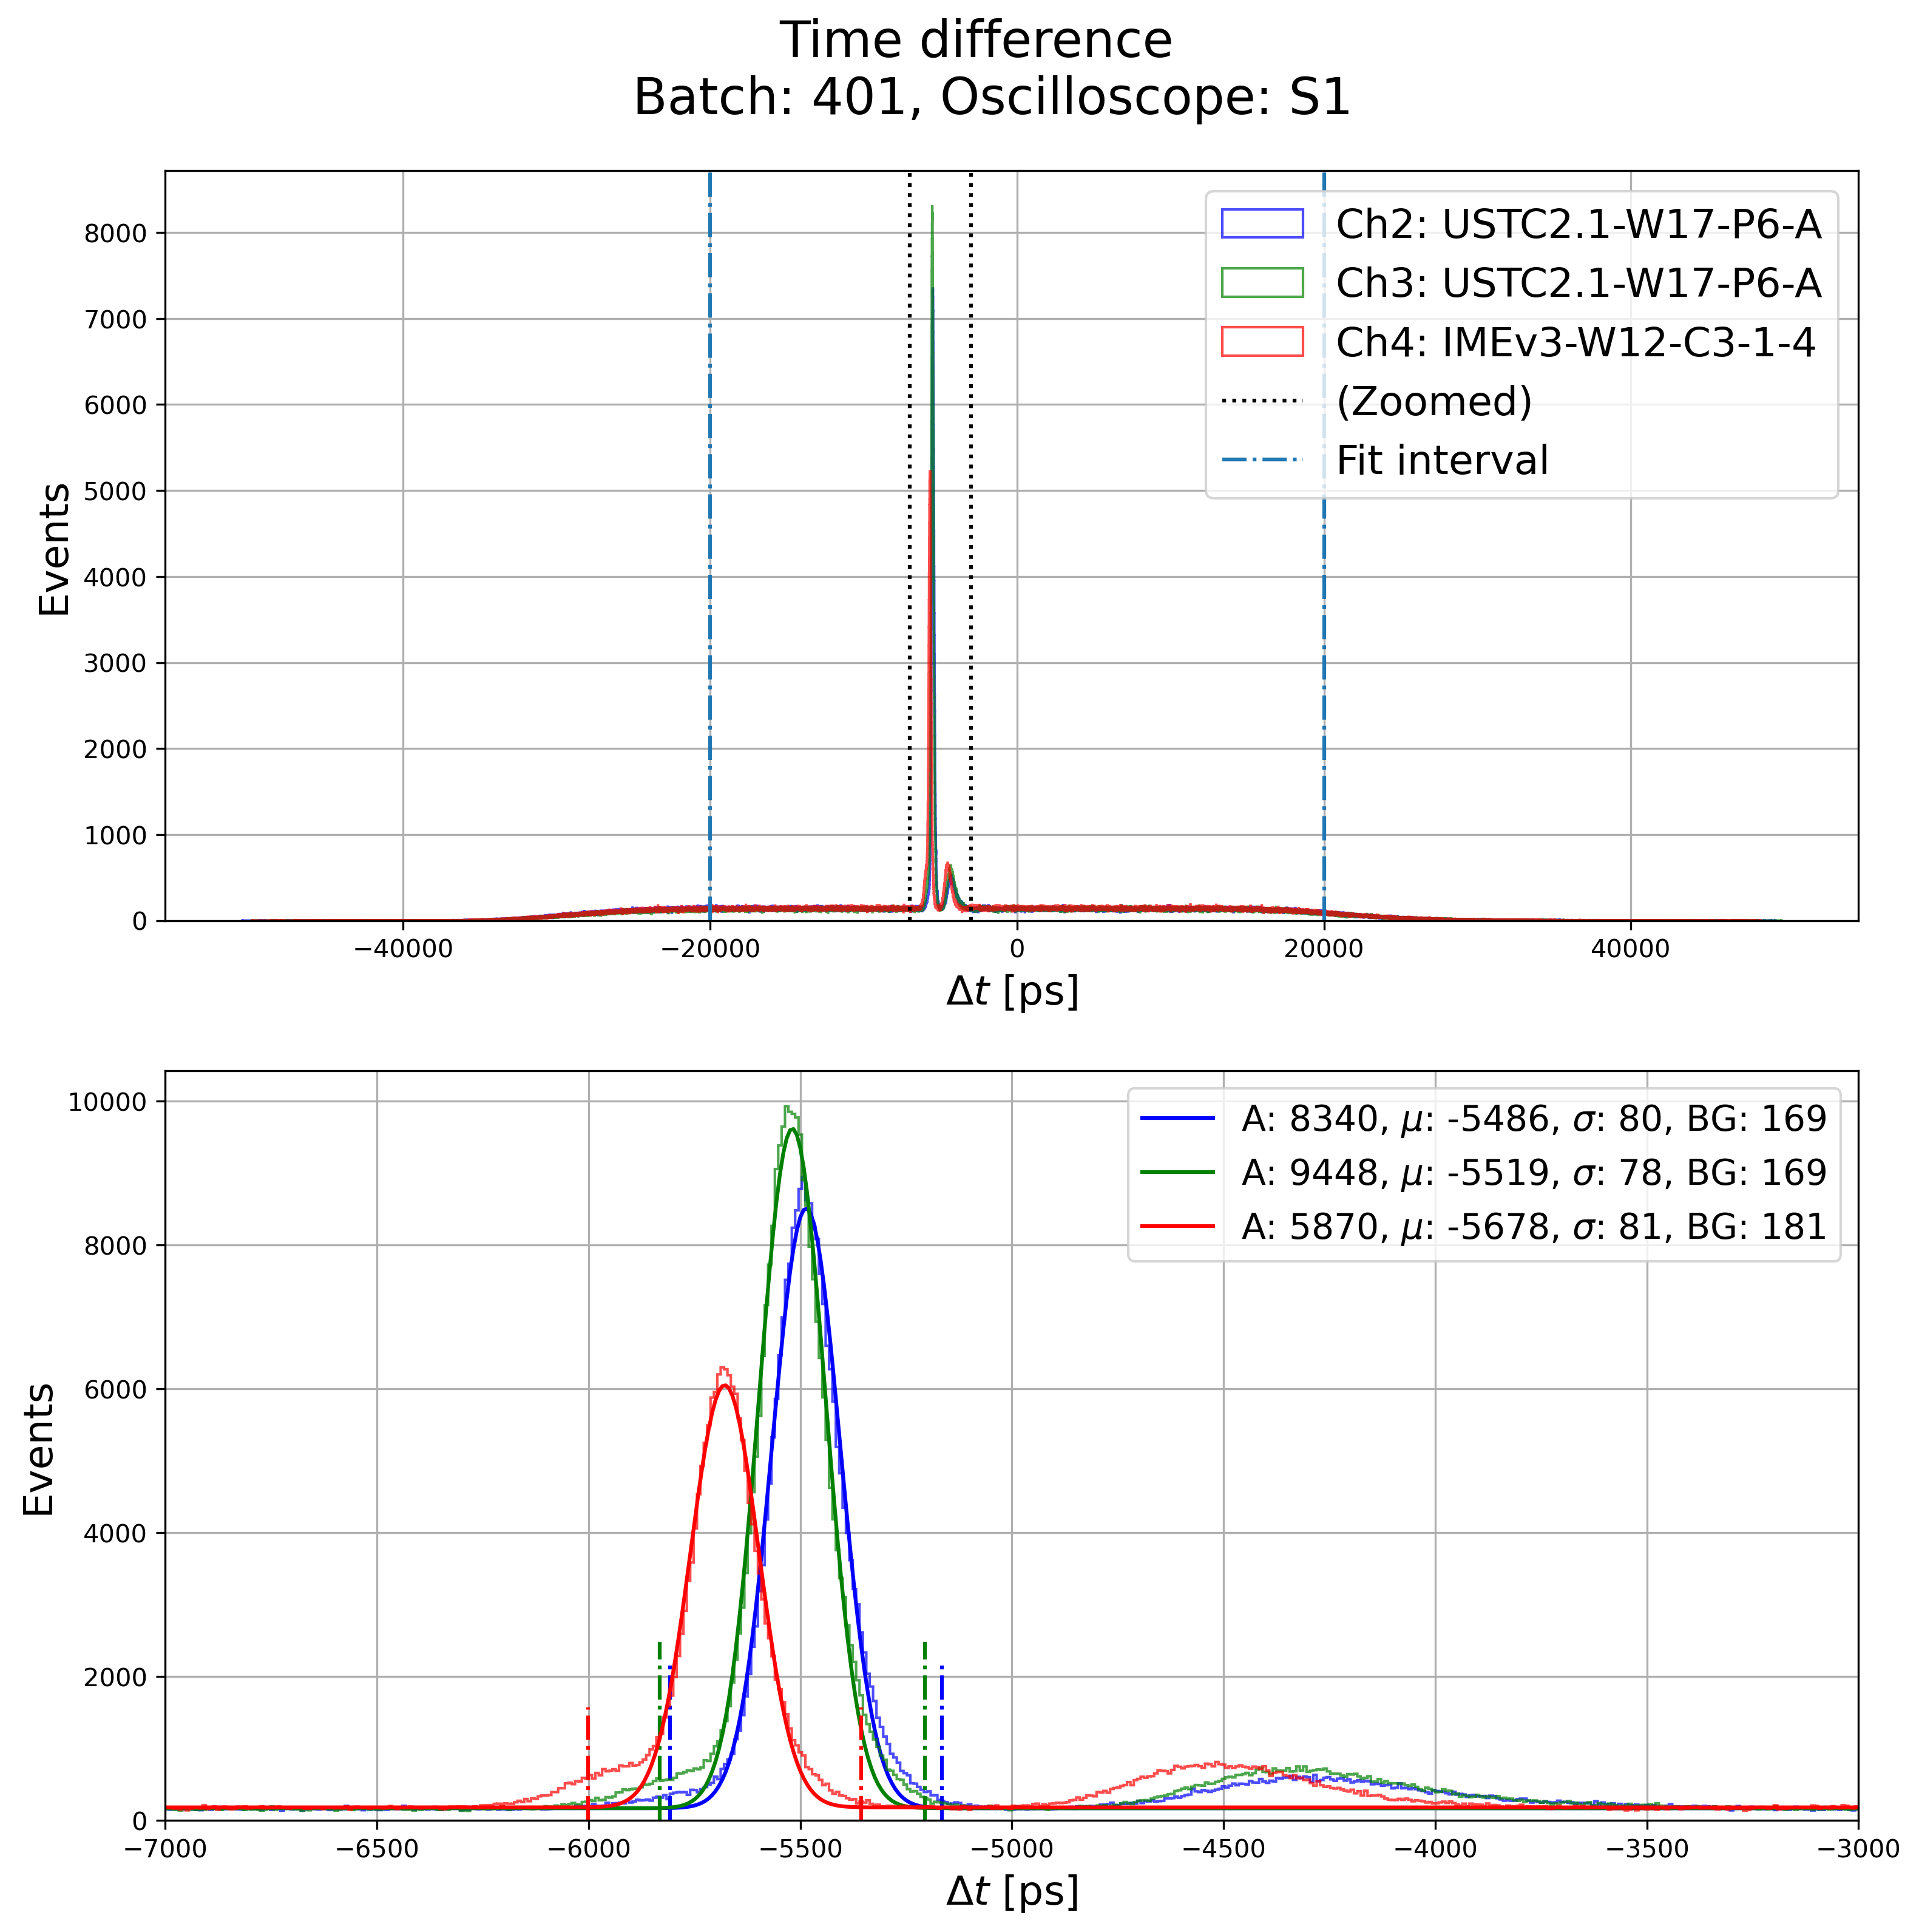

In [9]:
### SAME THING BUT ONLY FIRST PLOT
### now I fit between -20ns < delta t < 20ns
colormap = ['k','b','g','r']

fig, axes = plt.subplots(figsize=(12,12),nrows=2, ncols=1, dpi=300)

for dut in [1,2,3]:
    window_limit = 20e3
    window_fit = np.logical_and((df[f"timeCFD50_{dut}"]-df["timeCFD20_0"])> -window_limit,
                               (df[f"timeCFD50_{dut}"]-df["timeCFD20_0"])< +window_limit)
    
    plot_histogram((df[f"timeCFD50_{dut}"]-df["timeCFD20_0"]),
                   bins=15000, color=colormap[dut], linewidth=1, alpha=0.7,
                   label=f"Ch{dut+1}: {dict_of_batches[this_batch].S[S].get_sensor(f'Ch{dut+1}').name}",
                   fig_ax=(fig,axes[0]))
    
    
    hist, my_bins,_,_,_ = plot_histogram((df[f"timeCFD50_{dut}"].loc[window_fit]-df["timeCFD20_0"].loc[window_fit]),
                                         bins=5000, color=colormap[dut], linewidth=1, alpha=0.7,
                                         fig_ax=(fig,axes[1]))

    bins_centers = (my_bins[:-1]+my_bins[1:])/2
    initial_param = (np.max(hist),bins_centers[np.argmax(hist)],100,np.average(hist))
    param, covar = curve_fit(my_gauss, bins_centers, hist, p0=initial_param)#, sigma=hist**0.5, absolute_sigma=True)
#     print(f"Fit parameters: {param}")
    axes[1].plot(bins_centers, my_gauss(bins_centers,*param), color=colormap[dut])
    number_of_sigmas = 4
    left_base, right_base = param[1]-number_of_sigmas*param[2], param[1]+number_of_sigmas*param[2]
    axes[1].vlines(left_base, ymin=0, ymax=np.max(hist)/4, color=colormap[dut], linestyle='-.')
    axes[1].vlines(right_base, ymin=0, ymax=np.max(hist)/4, color=colormap[dut], linestyle='-.')
    ### add units to the parameters
    axes[1].plot([],[],color=colormap[dut], label="A: %.0f, $\mu$: %.0f, $\sigma$: %.0f, BG: %.0f" %(param[0],param[1], param[2], param[3])) # only two decimals

xlim = (-7e3,-3e3)
# xlim = (-10e3,0)
axes[0].set_xlabel(f"$\Delta t$ [ps]", fontsize=16)
axes[0].set_ylabel("Events", fontsize=16)
axes[0].axvline(xlim[0],linestyle=':',color='k',label='(Zoomed)')
axes[0].axvline(xlim[1],linestyle=':',color='k')
axes[0].axvline(-window_limit, linestyle='-.', label='Fit interval')
axes[0].axvline(+window_limit, linestyle='-.')
axes[0].legend(fontsize=16)

axes[1].set_xlabel(f"$\Delta t$ [ps]", fontsize=16)
axes[1].set_ylabel("Events", fontsize=16)
axes[1].set_xlim(xlim)
axes[1].legend(fontsize=14)

fig.suptitle(f"Time difference \
\n Batch: {this_batch}, Oscilloscope: {S}",y=.95, fontsize=20)
# fig.savefig(os.path.join(pres_path,f"time_difference_{this_batch}_{S}_zoomed_and_gauss_fit.png"), bbox_inches="tight")

### Plot where the second peaks are

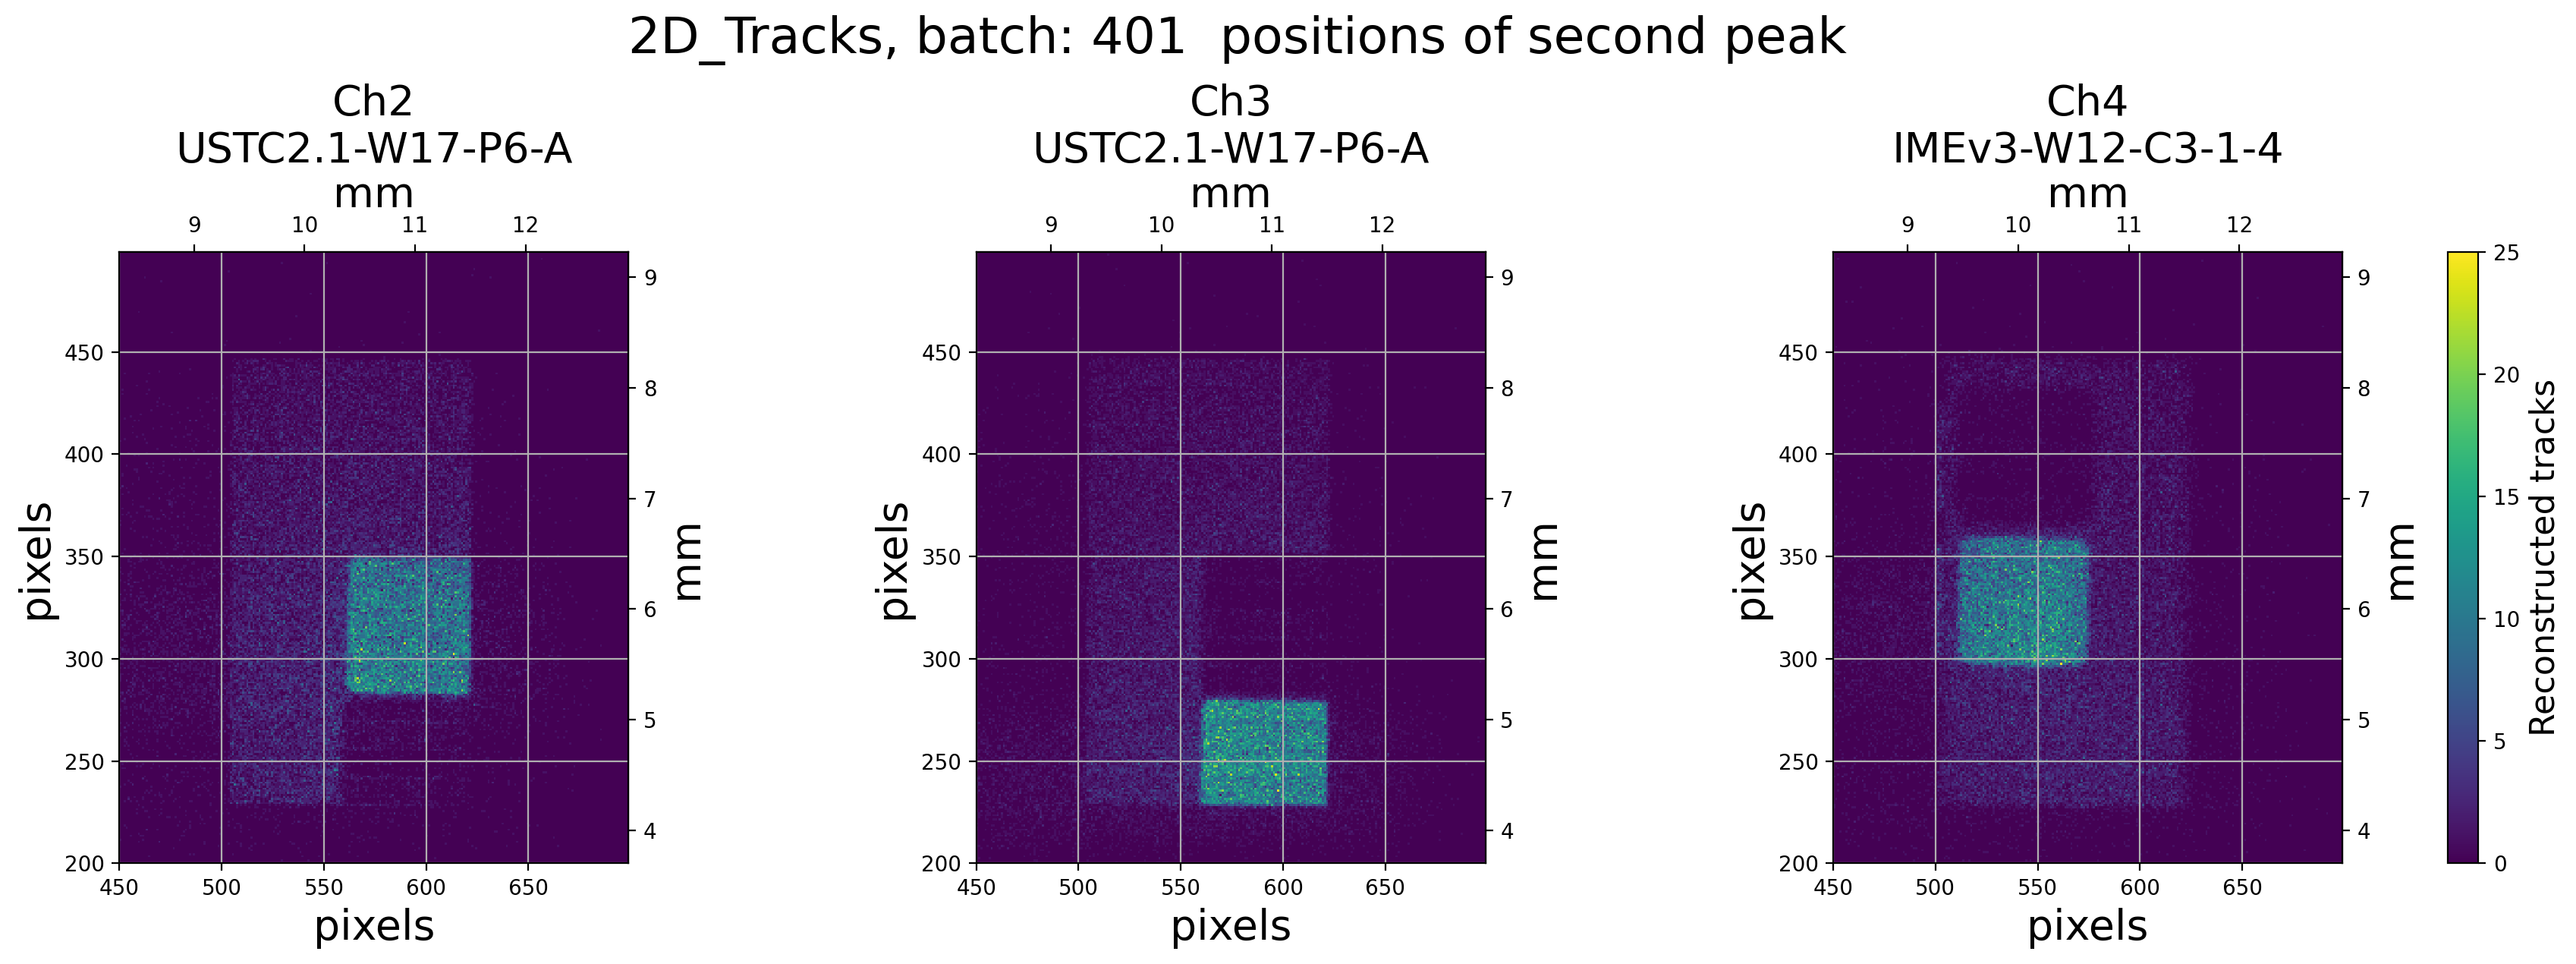

In [29]:
SAVE = True
second_peak_cut = [np.logical_and((df[f"timeCFD50_{dut}"]-df["timeCFD20_0"])> -5e3,
                               (df[f"timeCFD50_{dut}"]-df["timeCFD20_0"])< -3.5e3) for dut in DUTs]

fig, ax = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=bins1, n_DUT=DUTs, mask=second_peak_cut,
                    savefig=SAVE, savefig_path=pres_path, savefig_details=f" positions of second peak",fmt='png')


parenthesis about the second/third peak in the $\Delta t$

## $\Delta t$ vs pulseHeight plot

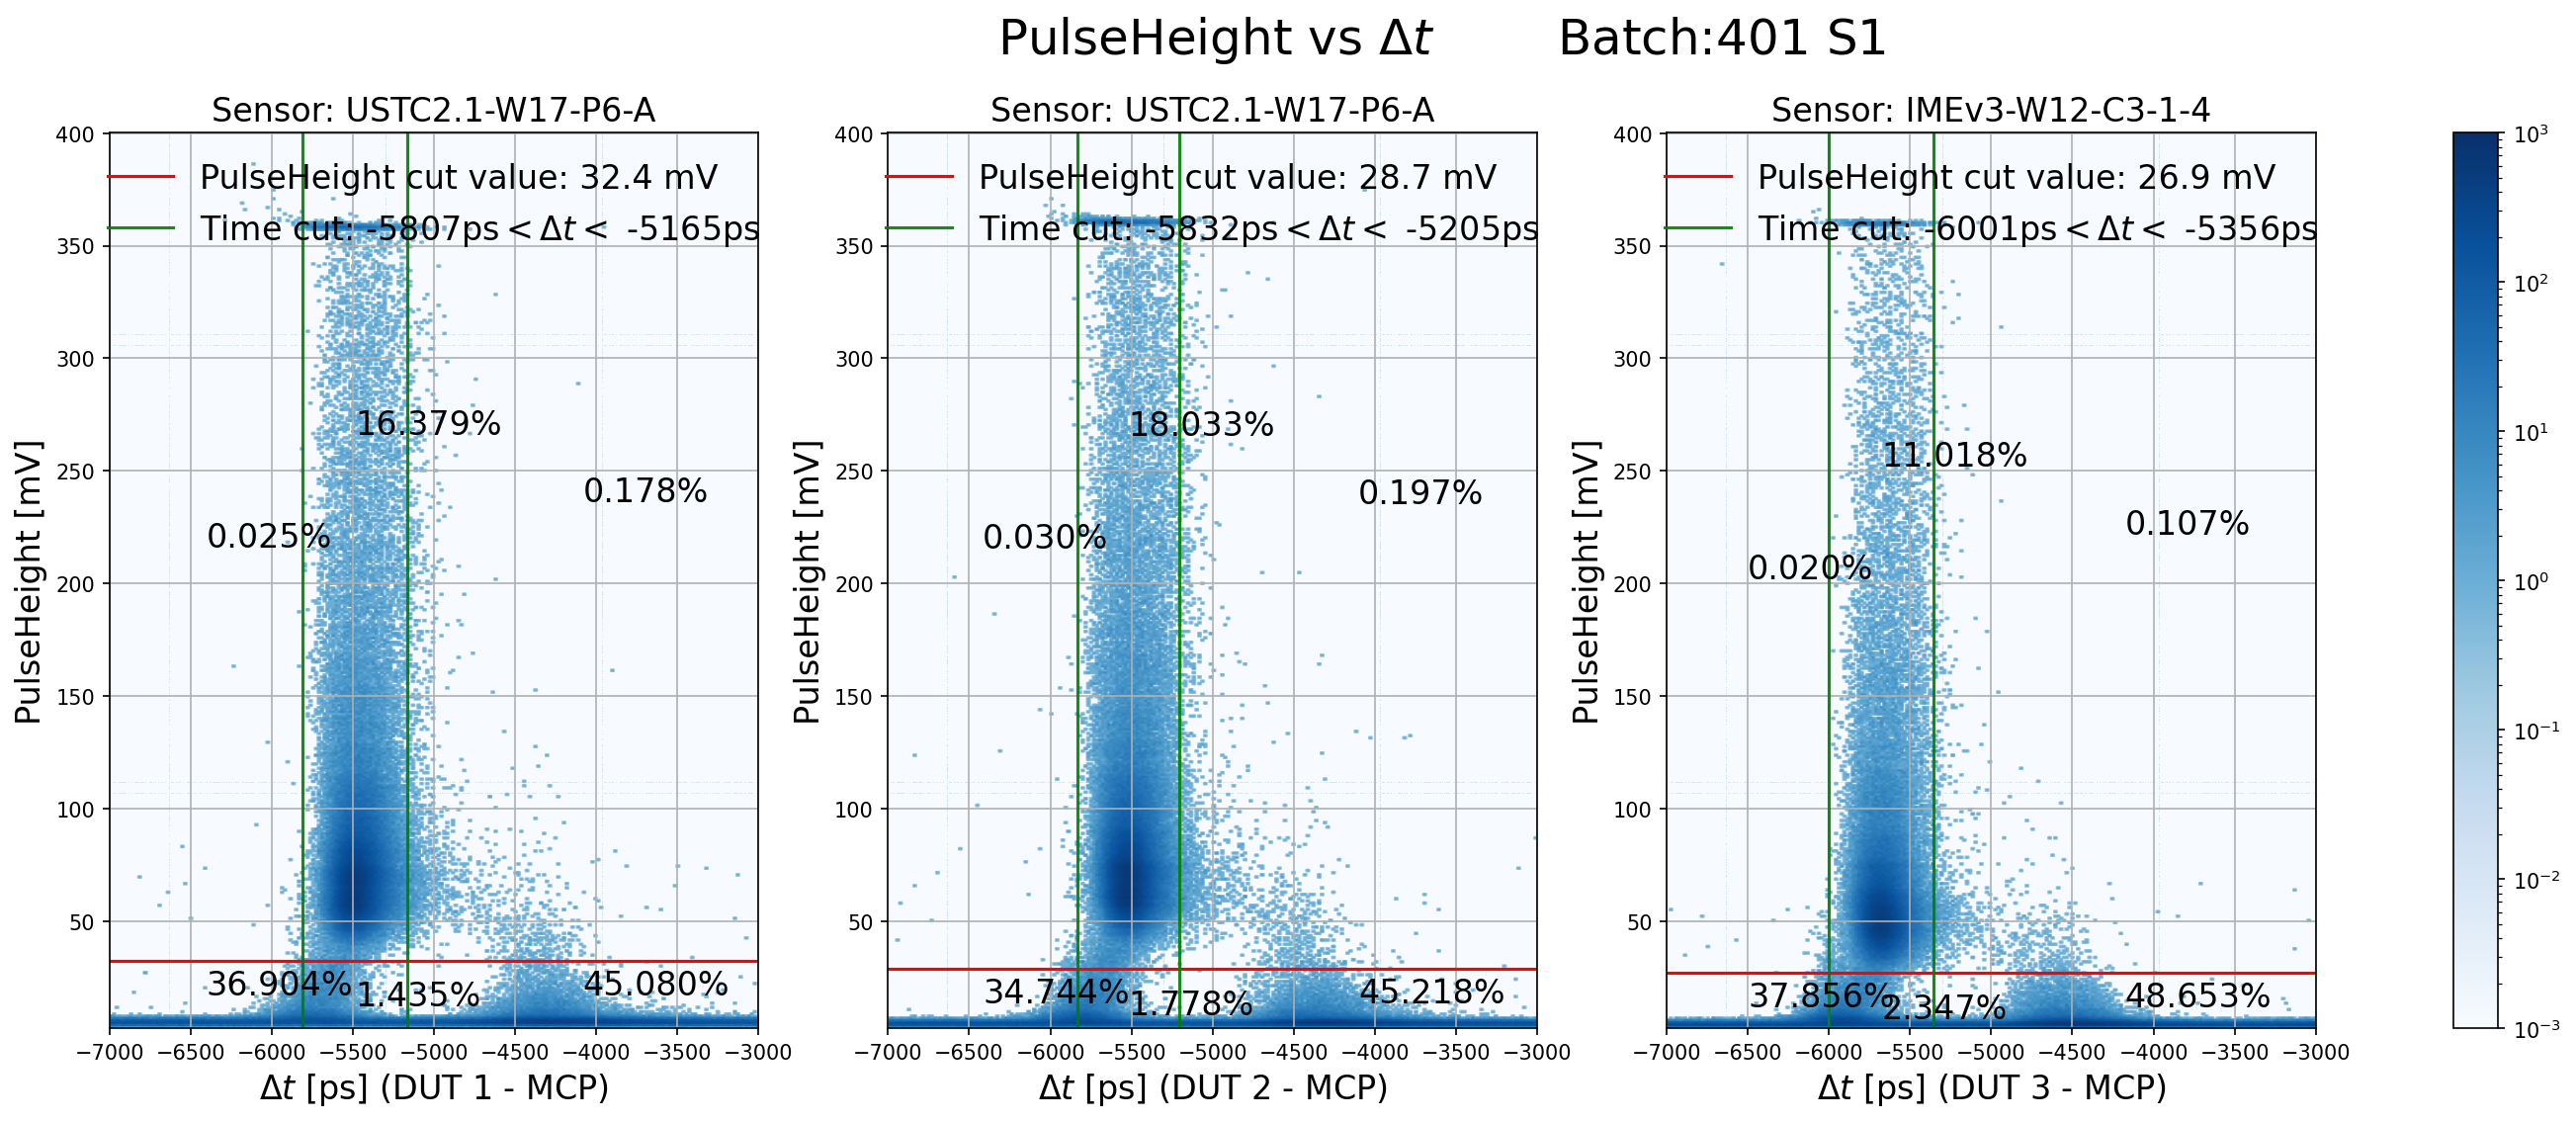

In [32]:
### I should probably add it to plot()

# xlim = (-10e3,0)
xlim = (-7e3,-3e3)

fig, axes = plt.subplots(figsize=(8*len(DUTs),8), ncols=len(DUTs), dpi=150, subplot_kw={'projection':'scatter_density'})#, sharey=True )
for i,dut in enumerate(DUTs):

    info = time_mask(df, dut, bins=10000, plot=False)[1]
    left_base, right_base = info['left_base'], info['right_base']
    
    pulse_cut = mins[dut]
    time_array = np.array(df[f'timeCFD50_{dut}']-df[f'timeCFD20_0'])
    pulseheight_array = np.array(df[f'pulseHeight_{dut}'])
#     axes[i].plot(time_array, pulseheight_array, '.', markersize=1.8, alpha=0.1)
    im = axes[i].scatter_density(time_array, pulseheight_array, cmap='Blues', norm=colors.LogNorm(vmin=1e-3, vmax=1e3, clip=True))
    
    axes[i].set_xlim(xlim)
    ylim = axes[i].get_ylim()
    
    total = len(time_array)/100  ### so I get percentage directly
    axes[i].annotate(f"%.3f"%(len(time_array[np.logical_and(time_array<left_base, pulseheight_array<pulse_cut)])/total)+"%", ((xlim[0]+left_base)/2, pulse_cut-15), fontsize=16)
    axes[i].annotate(f"%.3f"%(len(time_array[np.logical_and(time_array>right_base, pulseheight_array<pulse_cut)])/total)+"%", ((right_base+xlim[1])/2, pulse_cut-15), fontsize=16)
    axes[i].annotate(f"%.3f"%(len(time_array[np.logical_and(np.logical_and(time_array>left_base, time_array<right_base), pulseheight_array<pulse_cut)])/total)+"%", ((right_base+left_base)/2, pulse_cut-20), fontsize=16)

    axes[i].annotate(f"%.3f"%(len(time_array[np.logical_and(time_array<left_base, pulseheight_array>pulse_cut)])/total)+"%", ((xlim[0]+left_base)/2, (pulse_cut+ylim[1])/2), fontsize=16)
    axes[i].annotate(f"%.3f"%(len(time_array[np.logical_and(time_array>right_base, pulseheight_array>pulse_cut)])/total)+"%", ((right_base+xlim[1])/2, (pulse_cut+ylim[1])/2+20), fontsize=16)
    axes[i].annotate(f"%.3f"%(len(time_array[np.logical_and(np.logical_and(time_array>left_base, time_array<right_base), pulseheight_array>pulse_cut)])/total)+"%", ((right_base+left_base)/2, (pulse_cut+ylim[1])/2+50), fontsize=16)

    axes[i].axhline(pulse_cut,color='r', label="PulseHeight cut value: %.1f mV"%pulse_cut)
    axes[i].axvline(left_base, color='g', alpha=.9, label="Time cut: %.0fps$<\Delta t<$ %.0fps"%(left_base, right_base))
    axes[i].axvline(right_base, color='g', alpha=.9)
    axes[i].set_xlabel(f"$\Delta t$ [ps] (DUT {dut} - MCP)", fontsize=16)
    axes[i].set_ylabel(f"PulseHeight [mV]", fontsize=16)
    axes[i].grid('-')
    axes[i].legend(fontsize=16, loc='upper center', framealpha=0)
    axes[i].set_title(f"Sensor: {dict_of_batches[this_batch].S[S].get_sensor(f'Ch{dut+1}').name}", fontsize=16)
    
for ax in axes:
    ax.sharey(axes[0])
    
cb = fig.colorbar(im, ax=axes)
fig.suptitle(f"PulseHeight vs $\Delta t$ \t Batch:{this_batch} {S} ", fontsize=24)

# fig.savefig(os.path.join(pres_path,f"pulseHeight_vs_deltat_{this_batch}_{S}_{DUTs}.png"), bbox_inches='tight') ### svg is way too big

- charge calculations
- efficiency plot 1D and 2D
- efficiency w.r.t the threshold charge

## Charge calculations

In [15]:
transimpedance = [dict_of_batches[this_batch].S[S].get_sensor(f'Ch_{dut+1}').transimpedance for dut in DUTs]
mins = [find_min_btw_peaks(df[f"pulseHeight_{dut}"], bins='rice', plot=False) for dut in DUTs]

geo_cuts = [geometry_mask(df, DUT_number=dut, bins=bins1, bins_find_min='rice')[0] for dut in DUTs]
time_cuts = [time_mask(df, DUT_number=dut)[0] for dut in DUTs]
pulse_cuts = [df[f'pulseHeight_{dut}']>mins[dut-1] for dut in DUTs]

Text(0.5, 1.05, 'Charge distribution and Landau*Gaussian fit')

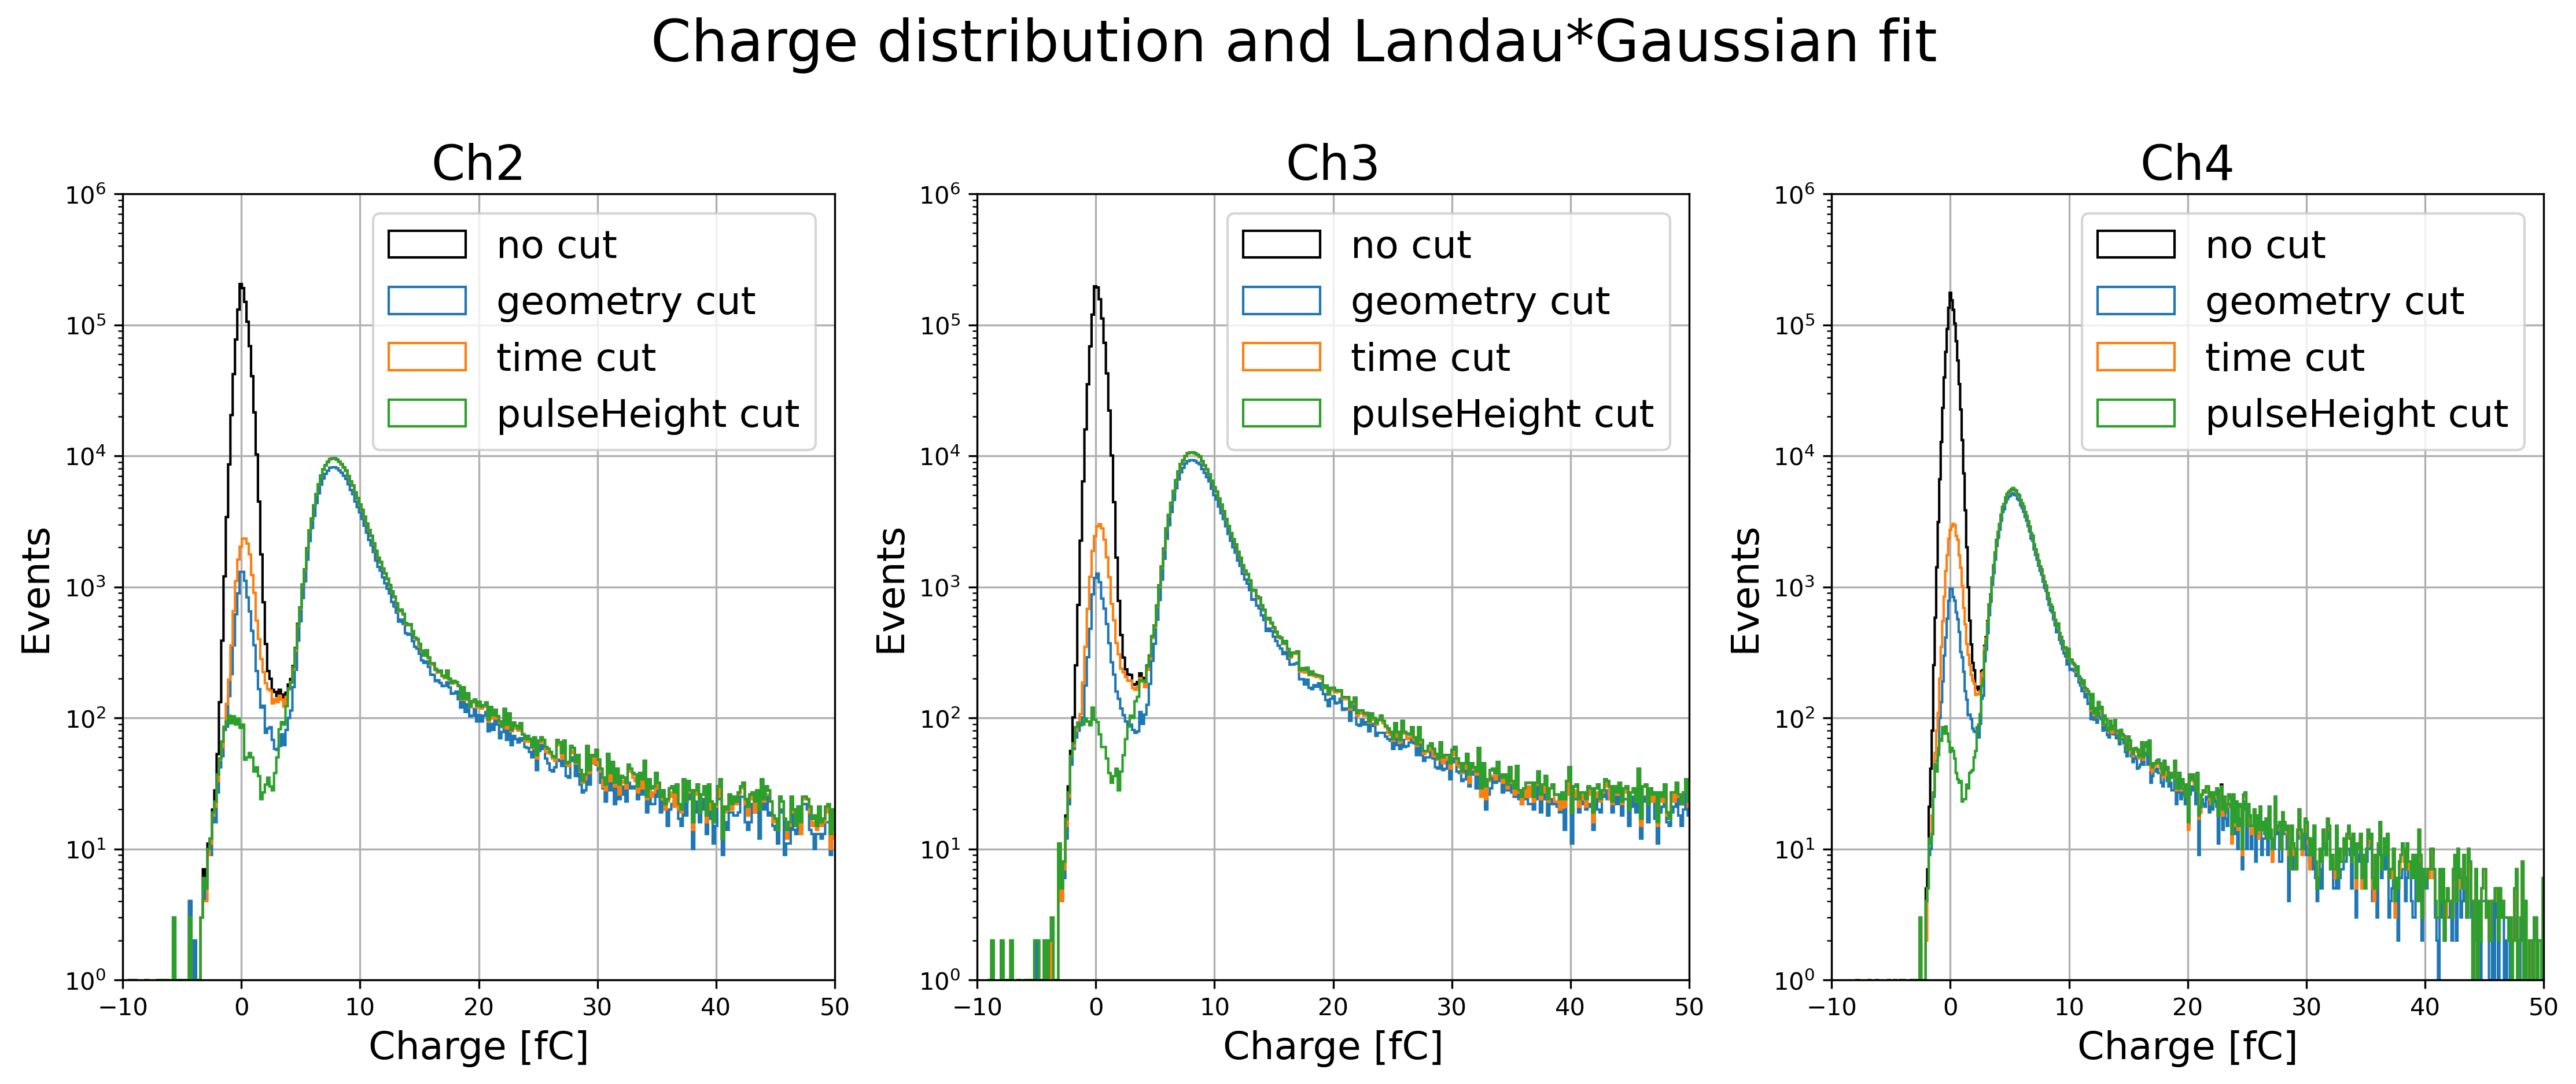

In [21]:
fig, axes = plt.subplots(figsize=(6*len(DUTs),6), ncols=len(DUTs), dpi=300)
# ax.axvline(x=charge_threshold, color='r', label=f'threshold charge: {charge_threshold}fC')
for i,dut in enumerate(DUTs):
    hist,my_bins,_,_,_ = plot_histogram(df[f'charge_{dut}']/transimpedance[dut-1], bins=2000,
                                          color=colormap[0], label=f"no cut",
                                          fig_ax=(fig,axes[i]))
    
    hist_geo_cut,_,_,_,_ = plot_histogram((df[f'charge_{dut}'].loc[geo_cuts[dut-1]]/transimpedance[dut-1]), bins=my_bins,
                                                   histtype='step', alpha=1, label=f"geometry cut",
                                                   fig_ax=(fig,axes[i]))
    
    hist_time_cut,_,_,_,_ = plot_histogram((df[f'charge_{dut}'].loc[time_cuts[dut-1]]/transimpedance[dut-1]), bins=my_bins,
                                                   histtype='step', alpha=1, label=f"time cut",
                                                   fig_ax=(fig,axes[i]))
    
    hist_pulse_cut,_,_,_,_ = plot_histogram((df[f'charge_{dut}'].loc[pulse_cuts[dut-1]]/transimpedance[dut-1]), bins=my_bins,
                                                   histtype='step', alpha=1, label=f"pulseHeight cut",
                                                   fig_ax=(fig,axes[i]))
    
    bins_centers = (my_bins[1:]+my_bins[:-1])/2
    bins_centers = bins_centers.astype(np.float64)

#     param, covariance = curve_fit(pylandau.langau, bins_centers, hist_geo_time_cut, p0=(my_bins[np.argmax(hist_geo_time_cut)],1,1,np.max(hist_geo_time_cut)))
#     axes[i].plot(bins_centers, pylandau.langau(bins_centers, *param), label="Landau*Gaussian fit")
    
    axes[i].semilogy()
    axes[i].set_xlim(-10, 50)
    axes[i].set_ylim(1,1e6)
    axes[i].set_xlabel("Charge [fC]", fontsize=16)
    axes[i].set_ylabel("Events", fontsize=16)
    axes[i].grid('--')
    axes[i].set_title(f'Ch{dut+1}',fontsize=20)
    axes[i].legend(fontsize=16)
    
fig.suptitle(f"Charge distribution and Landau*Gaussian fit", fontsize=24, y=1.05)


#### Gaussian*Langau fit

/tmp/ipykernel_41592/1448081492.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[i].plot(bins_centers, pylandau.langau(bins_centers, *param), label="Landau*Gaussian fit")
/tmp/ipykernel_41592/1448081492.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[i].plot(bins_centers, pylandau.langau(bins_centers, *param), label="Landau*Gaussian fit")
/tmp/ipykernel_41592/1448081492.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[i].plot(bins_center

Text(0.5, 1.05, 'Charge distribution and Landau*Gaussian fit')

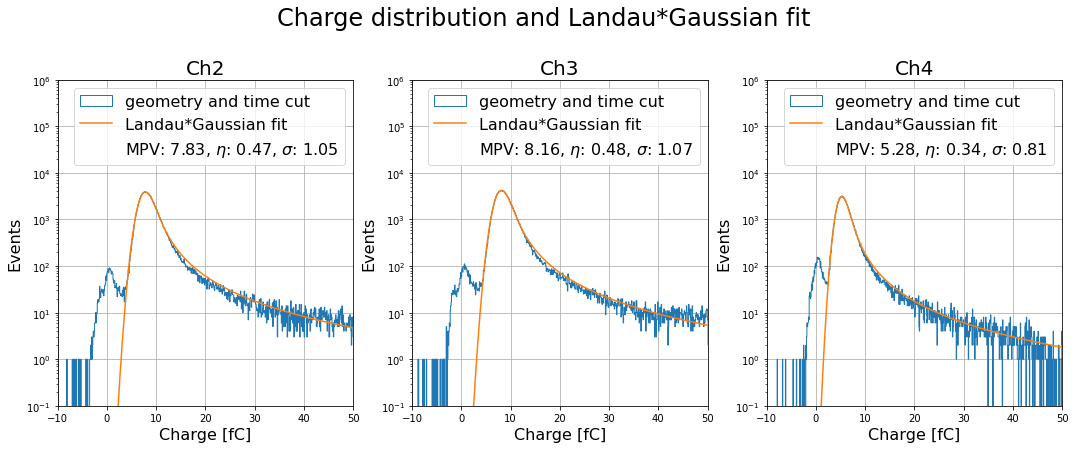

In [12]:
fig, axes = plt.subplots(figsize=(6*len(DUTs),6), ncols=len(DUTs))
# ax.axvline(x=charge_threshold, color='r', label=f'threshold charge: {charge_threshold}fC')
for i,dut in enumerate(DUTs):
    transimpedance = dict_of_batches[this_batch].S[S].get_sensor(f'Ch_{dut+1}').transimpedance
    hist_geo_time_cut,my_bins,_,_,_ = plot_histogram((df[f'charge_{dut}'].loc[np.logical_and(geo_cuts[dut-1],time_cuts[dut-1])]/transimpedance), bins='auto',
                                           histtype='step', alpha=1, label=f"geometry and time cut",
                                           fig_ax=(fig,axes[i]))

    bins_centers = (my_bins[1:]+my_bins[:-1])/2
    bins_centers = bins_centers.astype(np.float64)

    param, covariance = curve_fit(pylandau.langau, bins_centers, hist_geo_time_cut, p0=(my_bins[np.argmax(hist_geo_time_cut)],1,1,np.max(hist_geo_time_cut)))
    axes[i].plot(bins_centers, pylandau.langau(bins_centers, *param), label="Landau*Gaussian fit")
    
    axes[i].semilogy()
    axes[i].set_xlim(-10, 50)
    axes[i].set_ylim(0.1,1e6)
    axes[i].set_xlabel("Charge [fC]", fontsize=16)
    axes[i].set_ylabel("Events", fontsize=16)
    axes[i].grid('--')
    axes[i].set_title(f'Ch{dut+1}',fontsize=20)
    legend_text = "MPV: %.2f, $\eta$: %.2f, $\sigma$: %.2f" %(param[0],param[1], param[2]) # only two decimals
    handles, labels = axes[i].get_legend_handles_labels()
    handles.append(mpatches.Patch(color='none', label=legend_text))
    axes[i].legend(handles=handles, fontsize=16);
    
fig.suptitle(f"Charge distribution and Landau*Gaussian fit", fontsize=24, y=1.05)

# fig.savefig(f"../various plots/Charge_distribution_fit_Ch2_{this_batch}.svg",bbox_inches='tight')


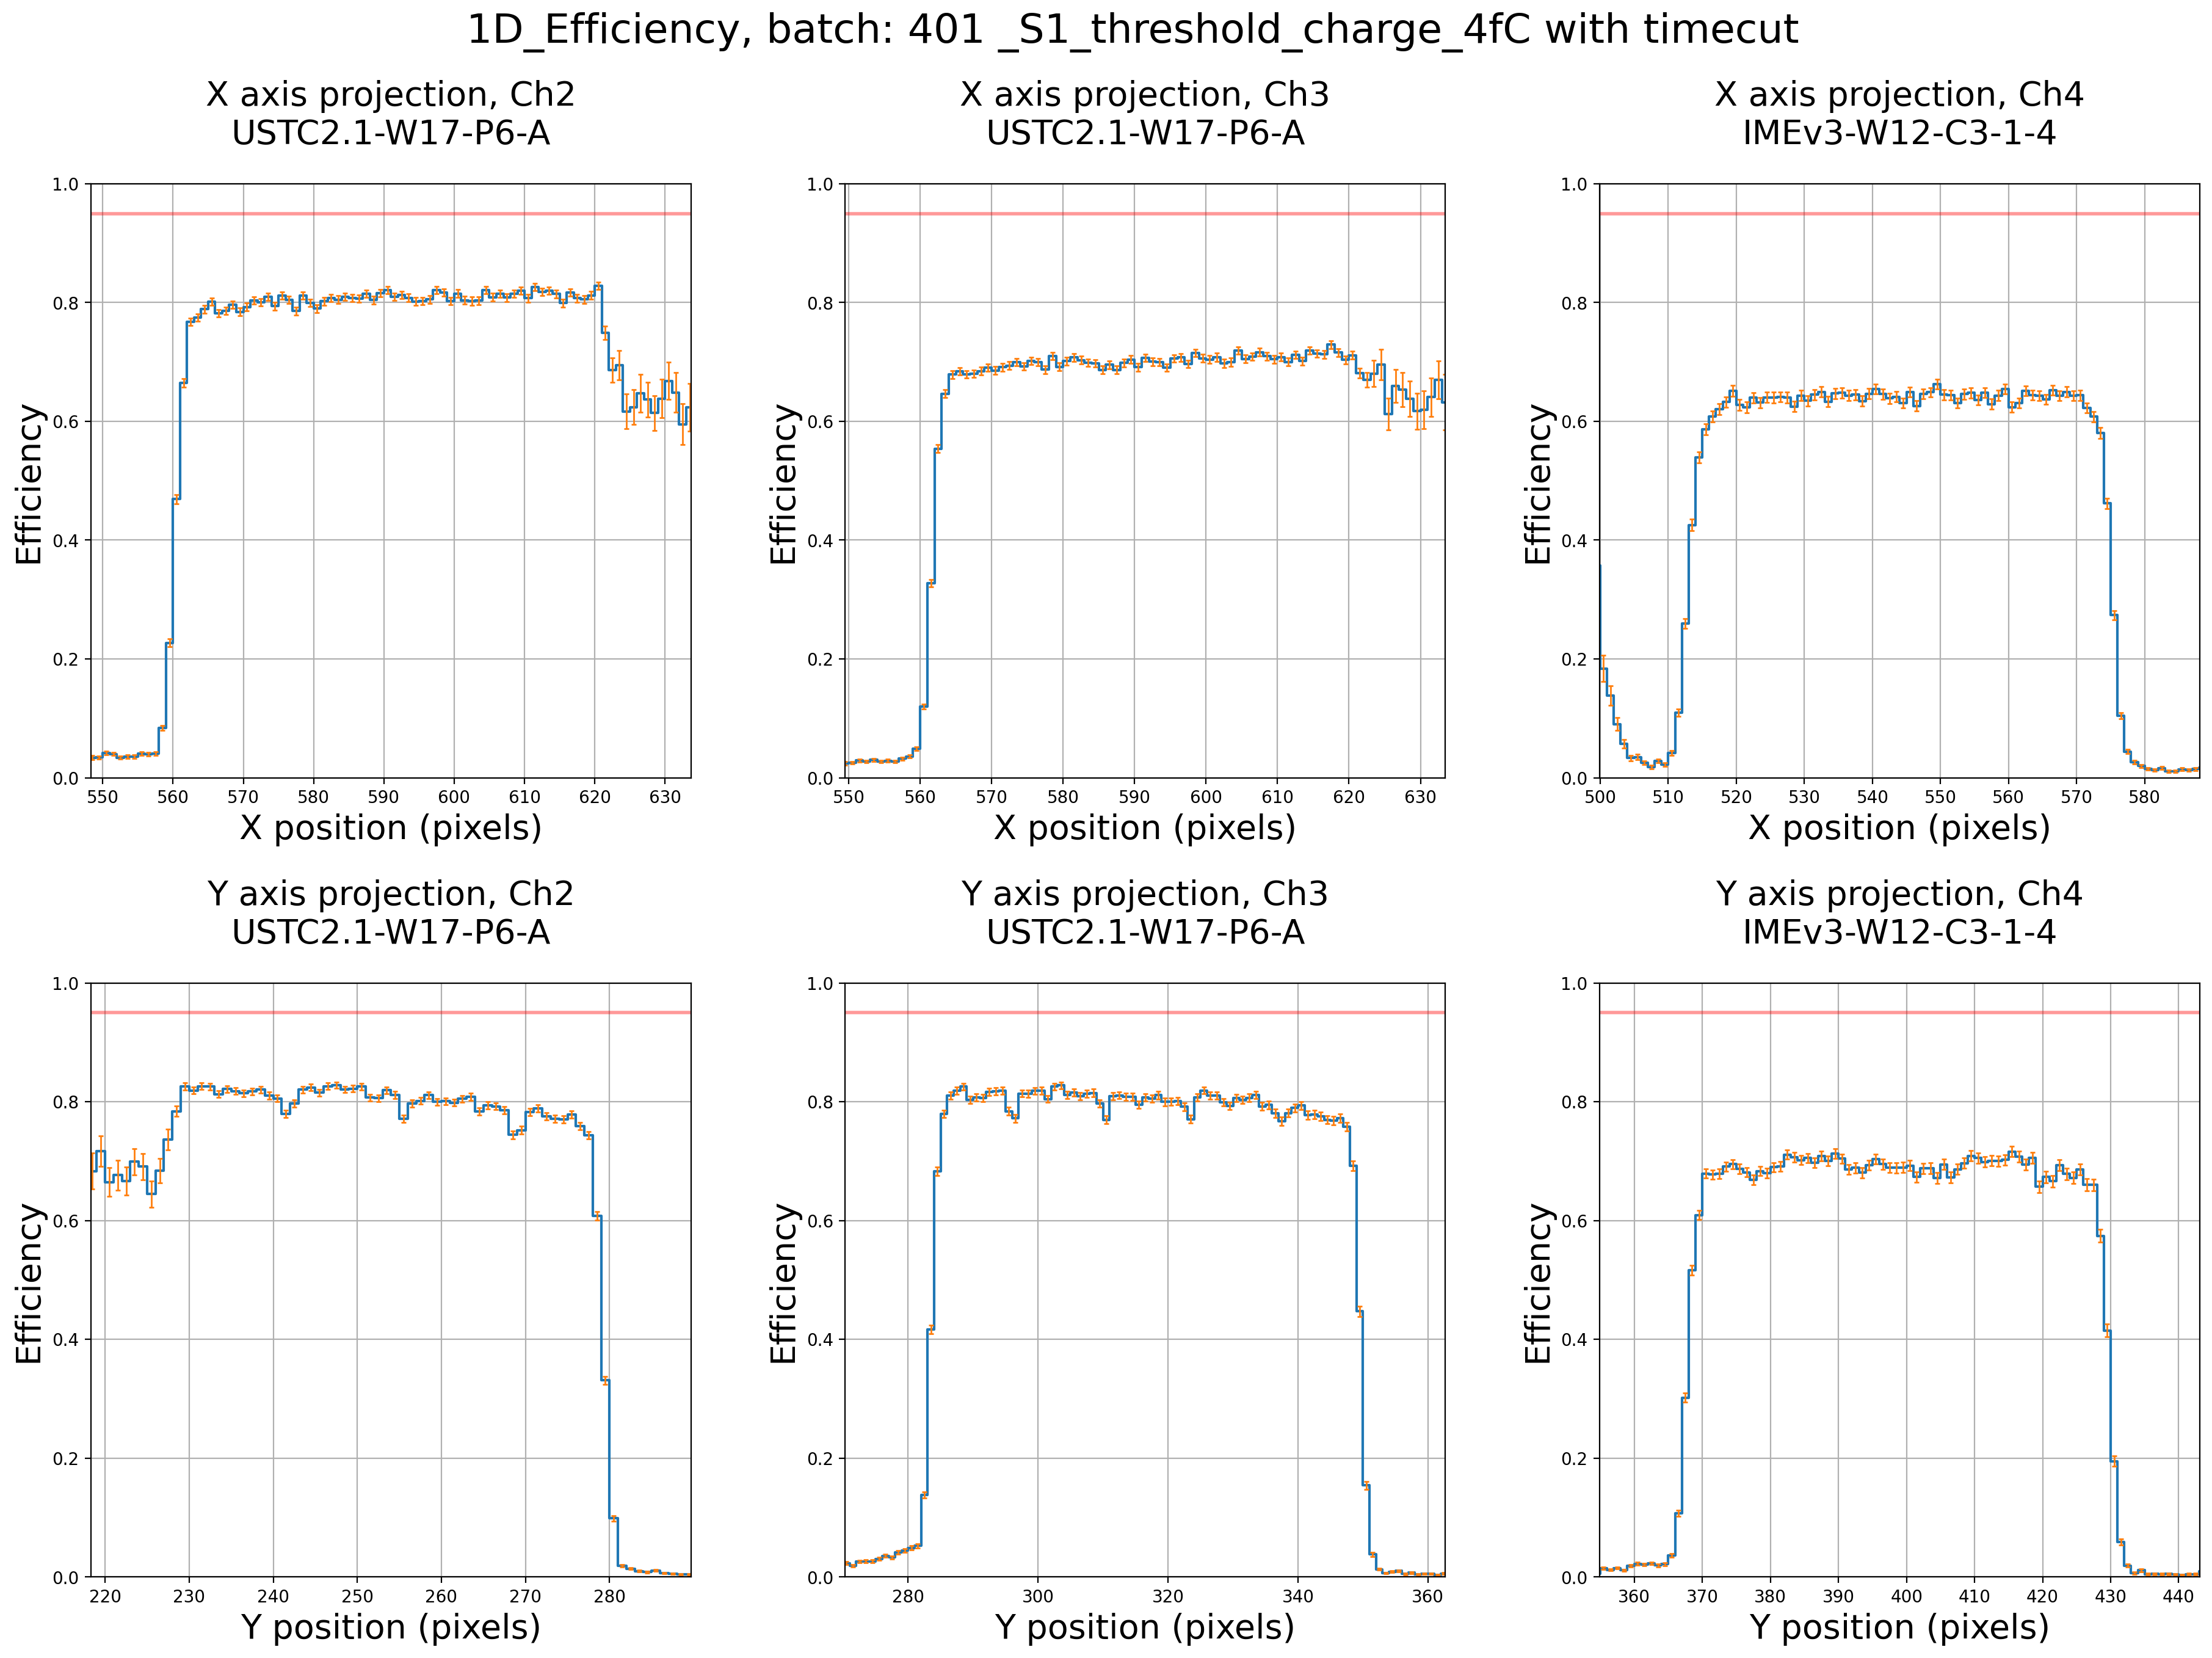

''

In [33]:
SAVE = False
plot(df, "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut='extended', zoom_to_sensor=True,
    bins=bins1, n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S}_threshold_charge_{threshold_charge}fC with timecut')
;

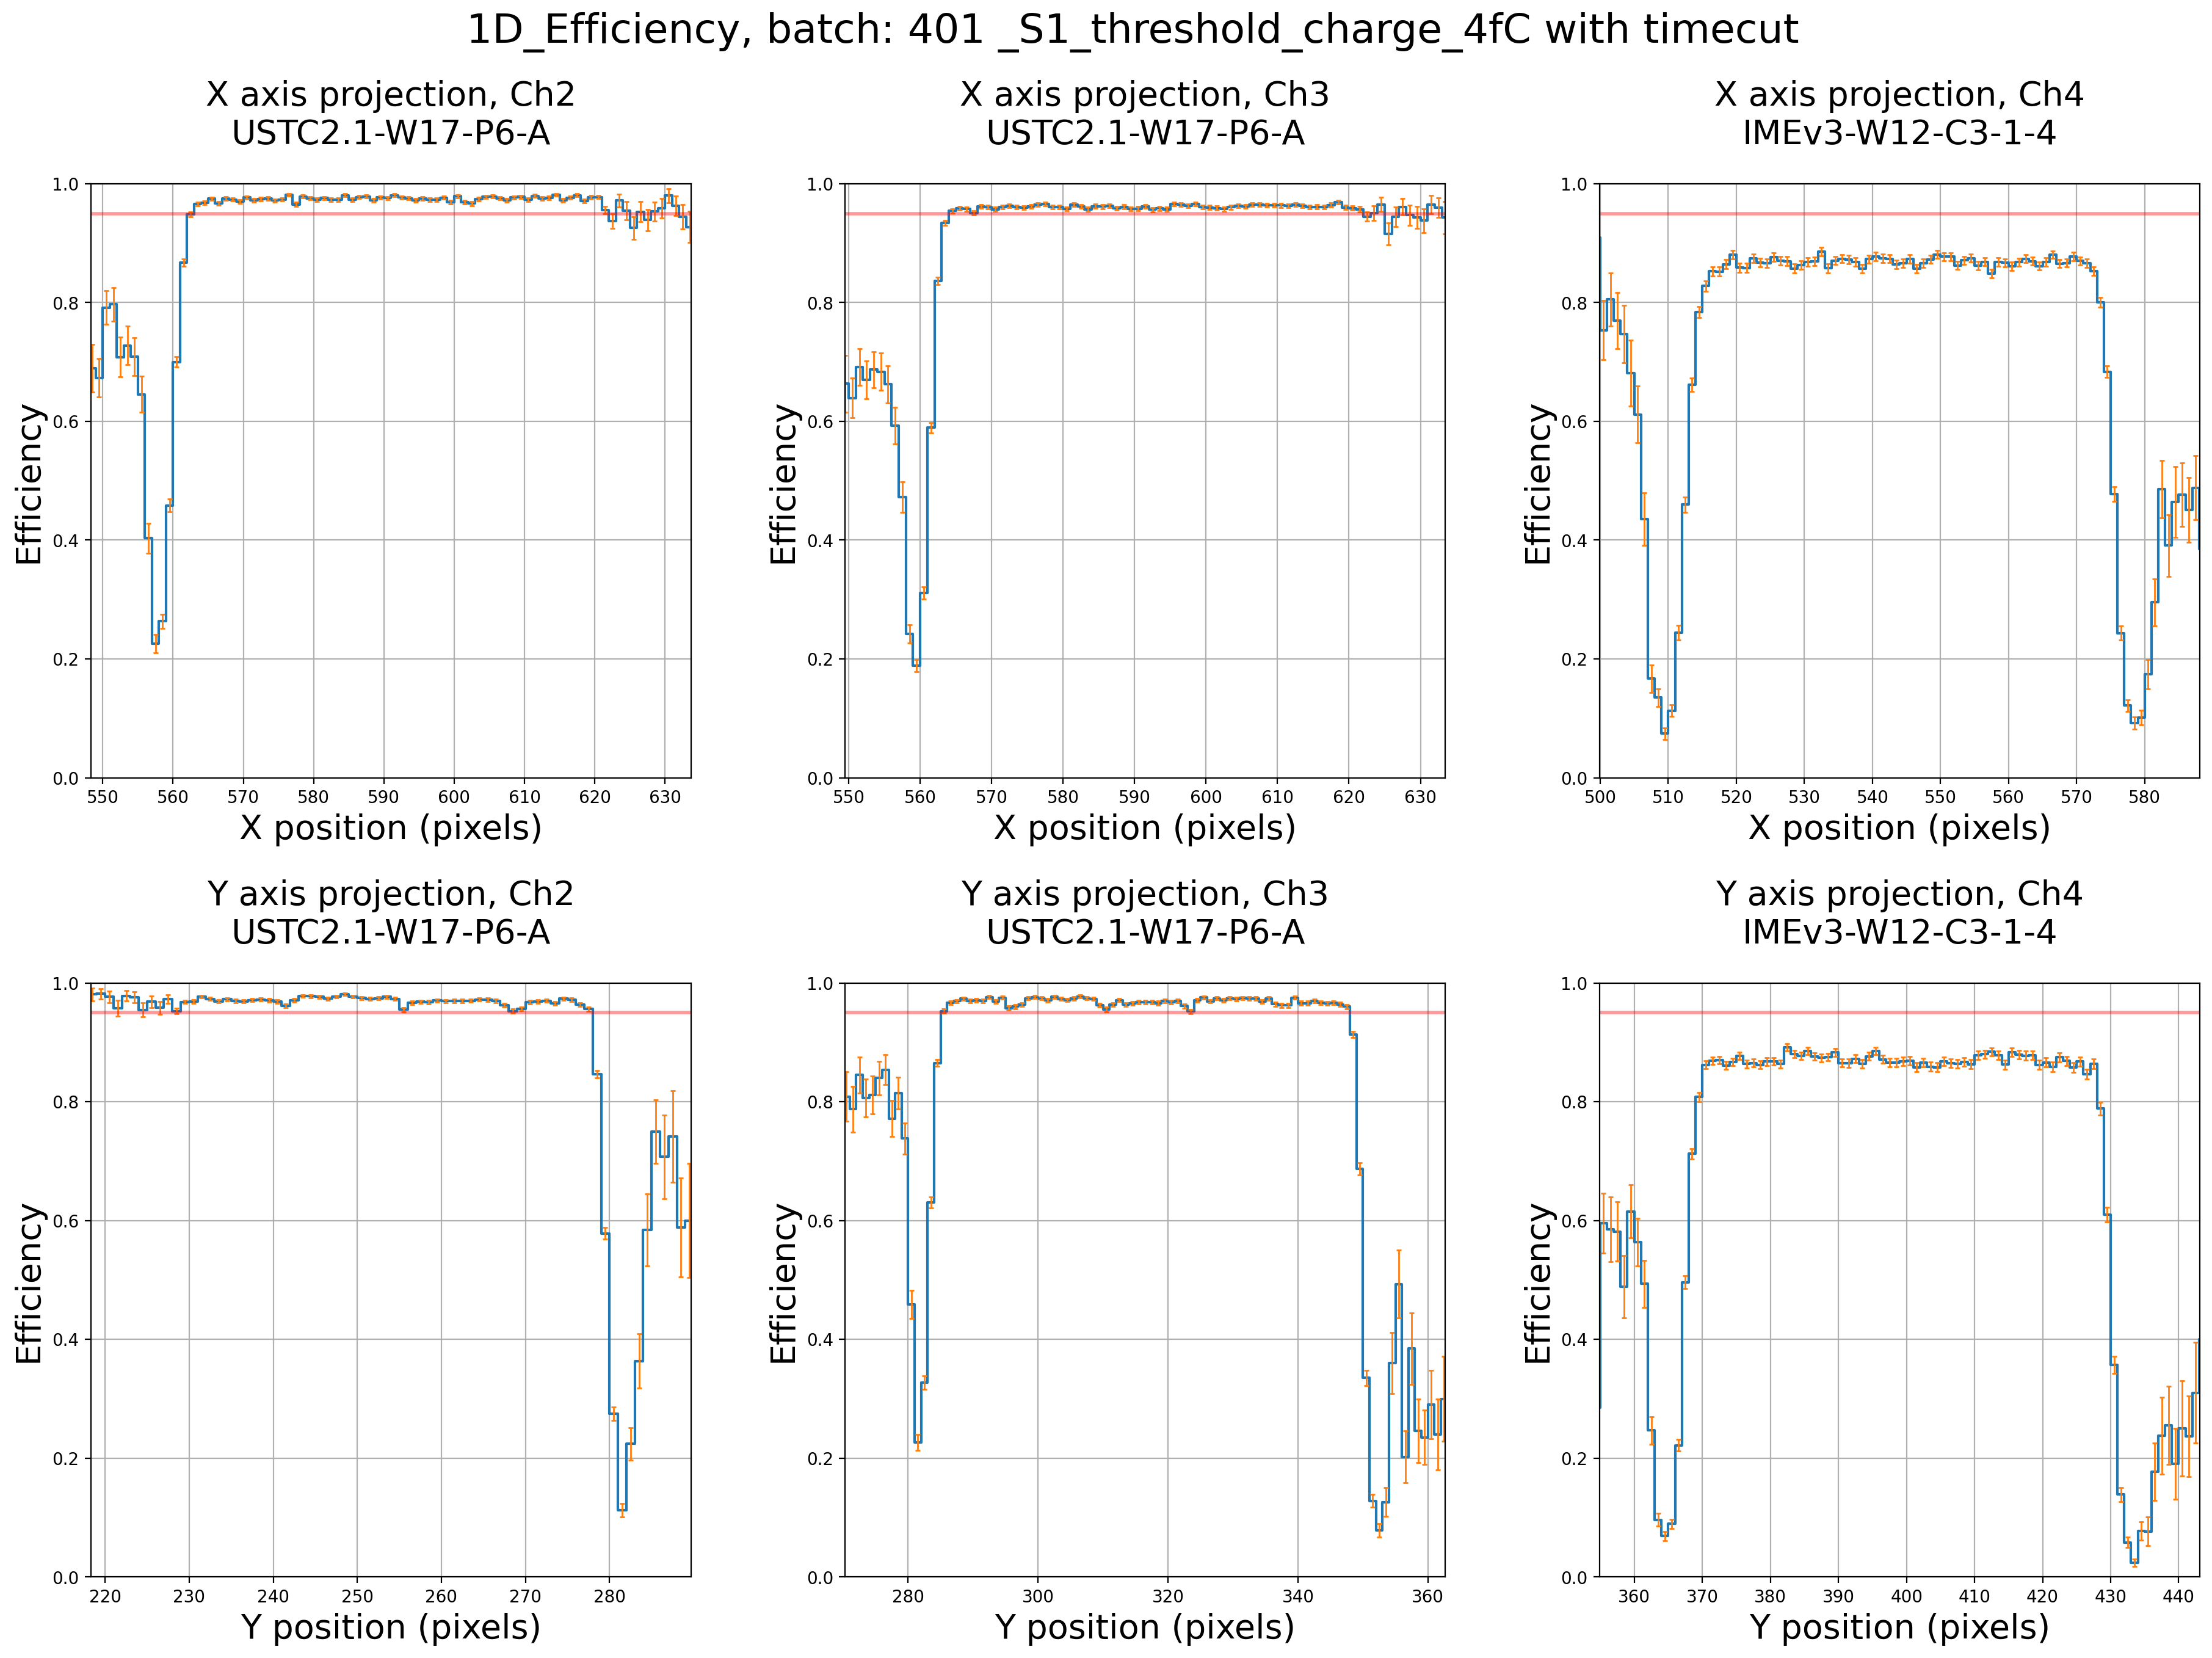

''

In [18]:
plot(df, "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut='extended', mask=time_cut, zoom_to_sensor=True,
    bins=bins1, n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S}_threshold_charge_{threshold_charge}fC with timecut')
;

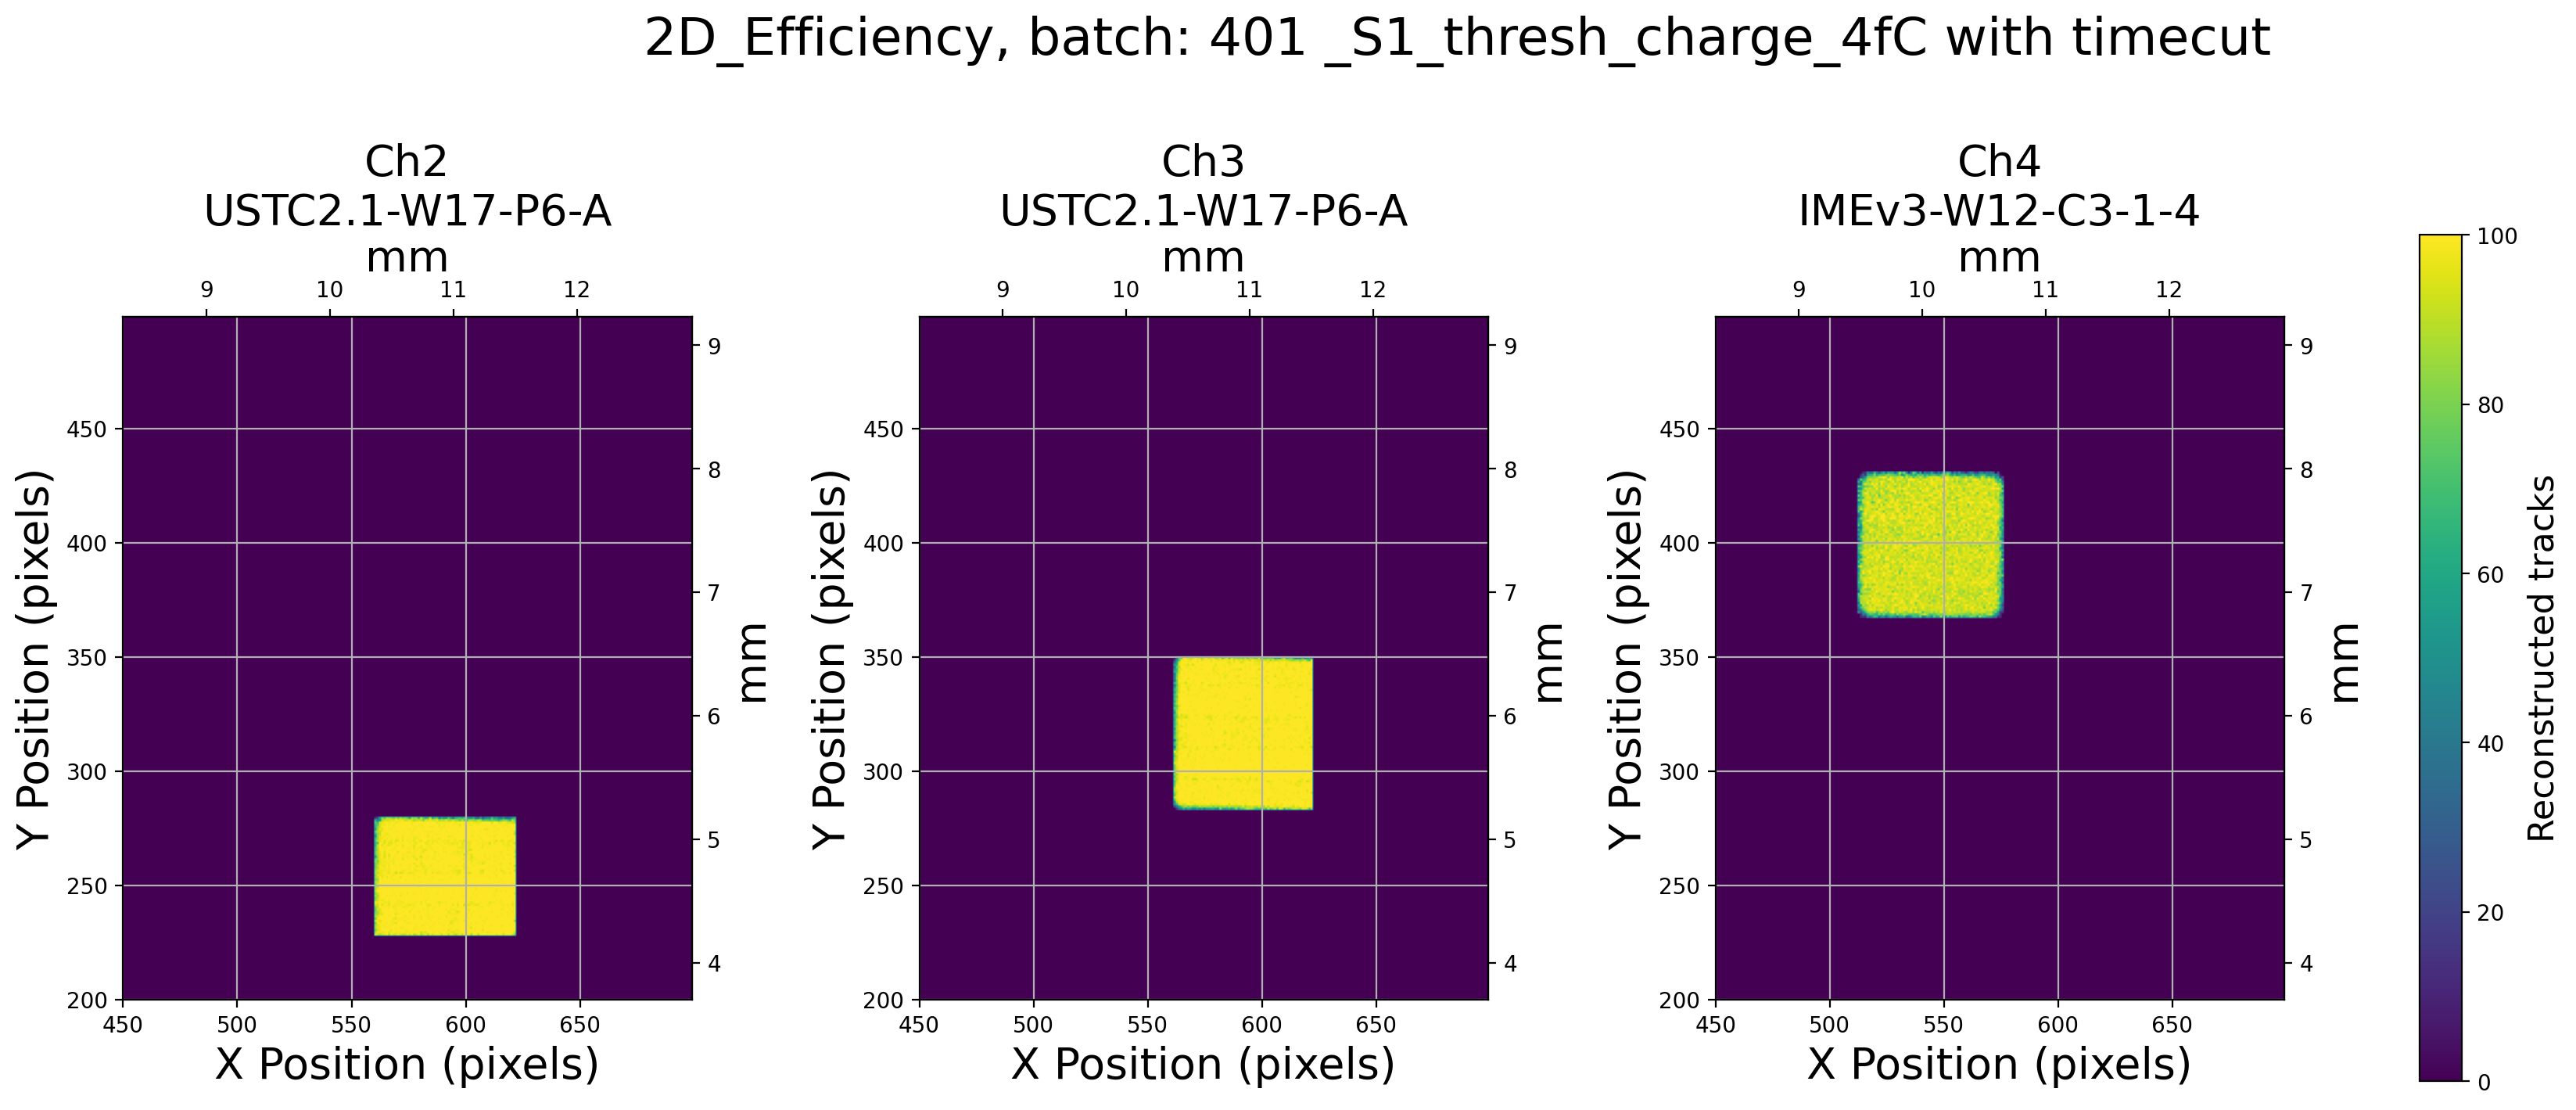

''

In [19]:
plot(df, "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut='normal', mask=time_cut, zoom_to_sensor=False,
    bins=bins1, n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S}_thresh_charge_{threshold_charge}fC with timecut')
;

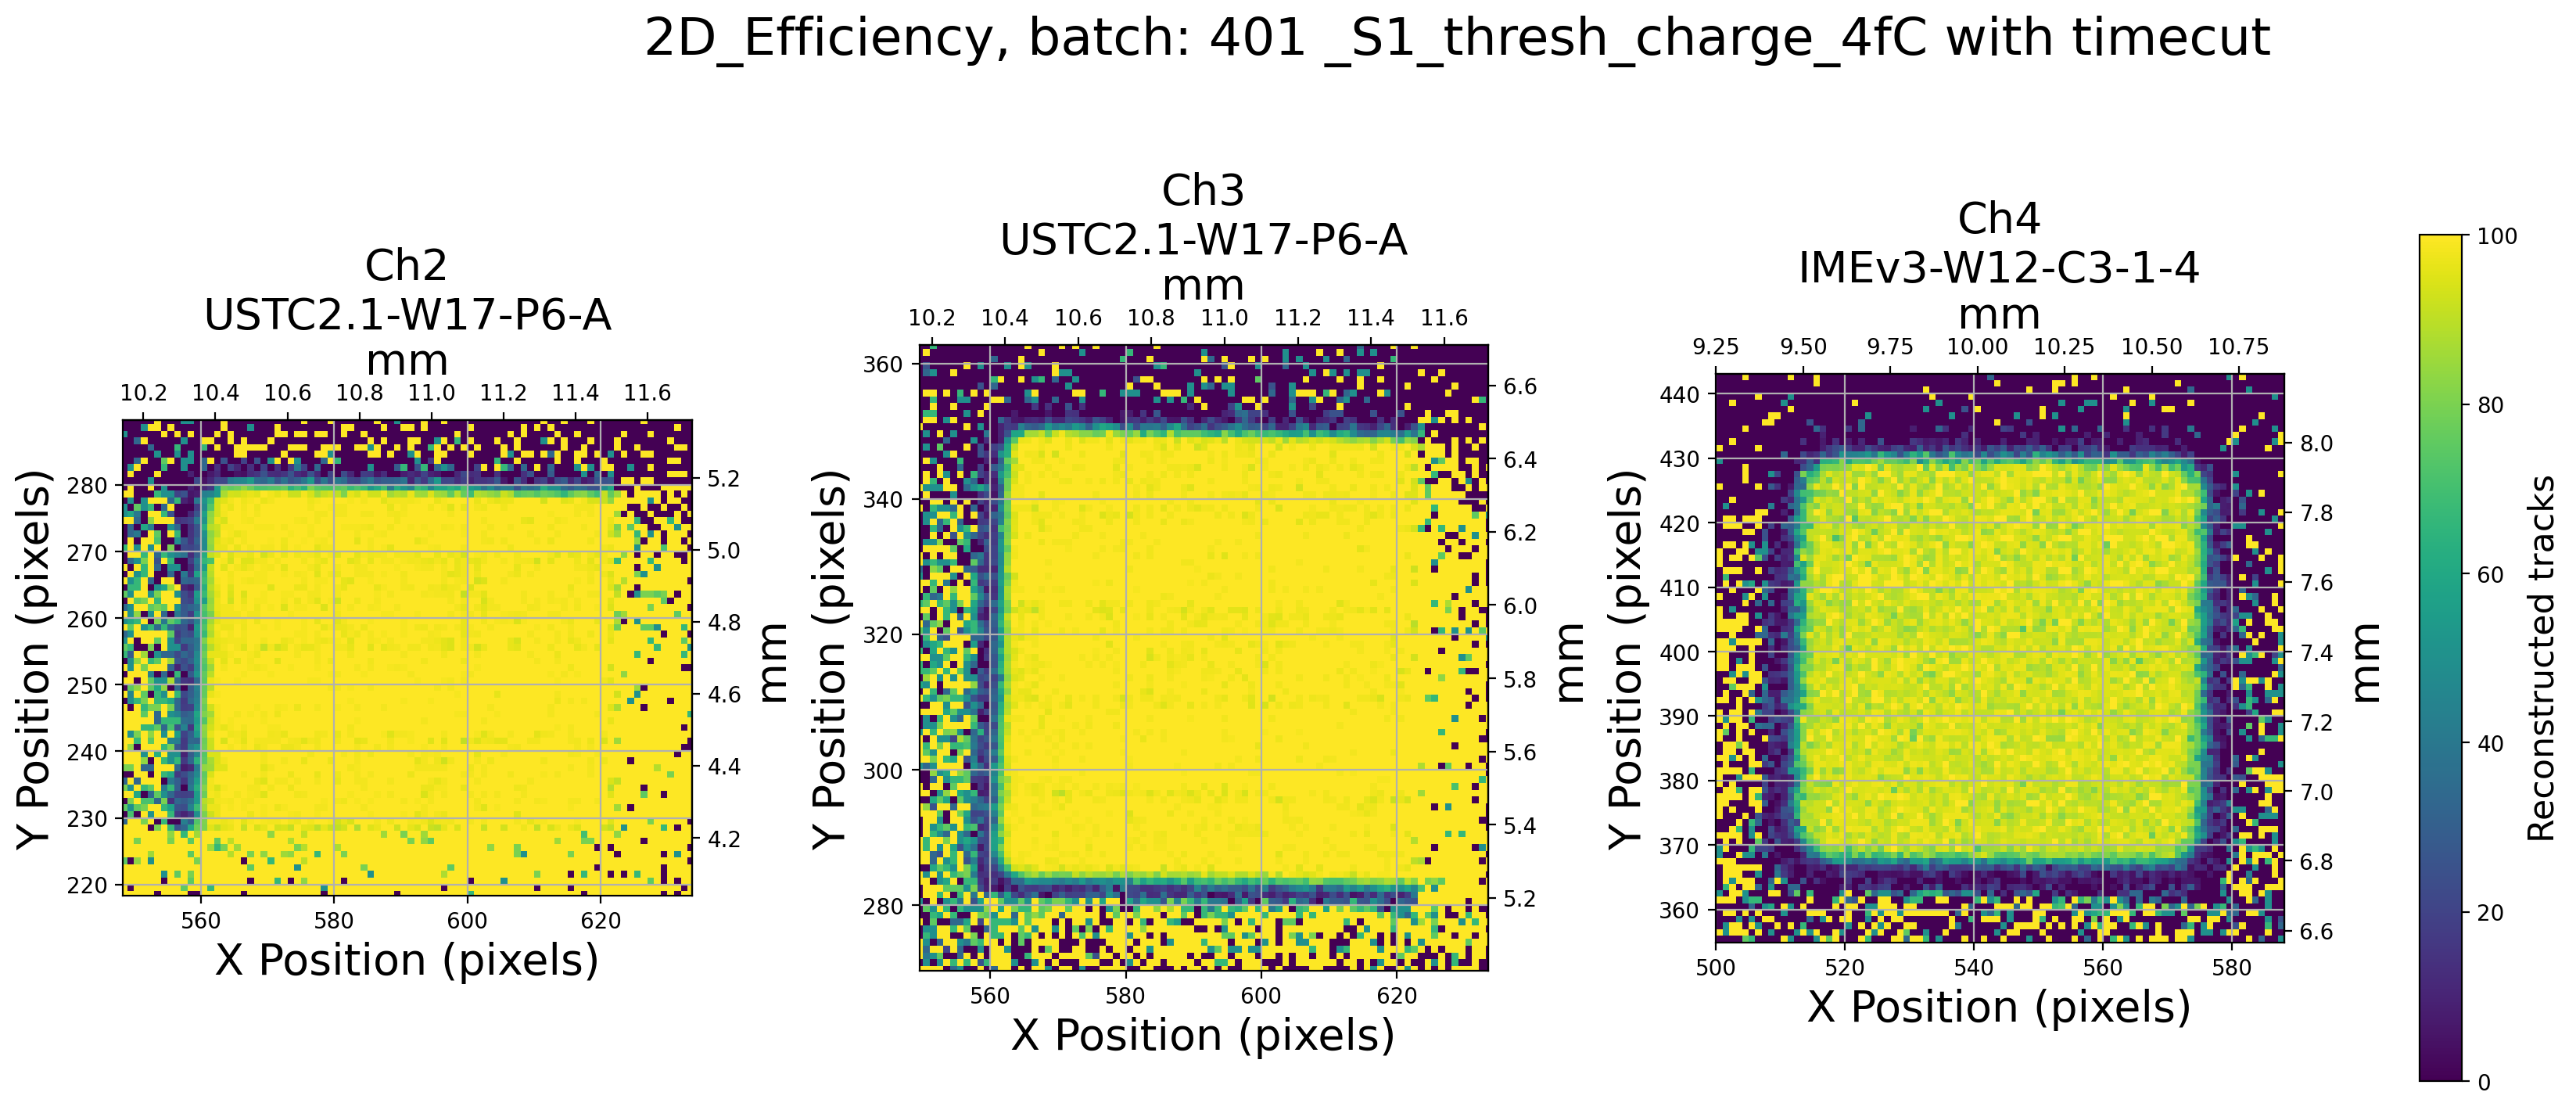

''

In [20]:
plot(df, "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, geometry_cut='extended', mask=time_cut, zoom_to_sensor=True,
    bins=bins1, n_DUT=DUTs, savefig=SAVE, savefig_details=f'_{S}_thresh_charge_{threshold_charge}fC with timecut')
;